# Set-Up

In [1]:
import pandas as pd
import re
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)

In [2]:
data_home = "C:/Users/johnw/Box/Michigan Parent Dashboard/Michigan Data"

In [3]:
MIFULLSCHOOLDATA = pd.read_csv(f"{data_home}/MIFULLSCHOOLDATA_11_27_23.csv", low_memory=False)
MIGENEDUSCHOOLDATA = pd.read_csv(f"{data_home}/MIGENEDUSCHOOLDATA_11_27_23.csv", low_memory=False)

In [4]:
MIGENEDUSCHOOLDATA

,Unnamed: 0,DistrictCode,District Name,Core Link,School Level,BuildingName_x,School Grade,School Link,Offering Link,ACS_CTE_AGFN,...,districtdummy_82995,districtdummy_82996,districtdummy_82997,districtdummy_83000,districtdummy_83010,districtdummy_83060,districtdummy_83070,districtdummy_83900,districtdummy_84010,districtdummy_84050
0,0,1010,Alcona Community Schools,https://legacy.mischooldata.org/ParentDashboar...,Elementary School,Alcona Elementary School,K-5,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1010,Alcona Community Schools,https://legacy.mischooldata.org/ParentDashboar...,Middle/High School,Alcona Community High School,6-12,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2010,AuTrain-Onota Public Schools,https://legacy.mischooldata.org/ParentDashboar...,Elementary/Middle School,AuTrain-Onota Public School,K-8,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2020,Burt Township School District,https://legacy.mischooldata.org/ParentDashboar...,Elementary through High School,Burt Township School,K-12,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2070,Munising Public Schools,https://legacy.mischooldata.org/ParentDashboar...,Elementary/Middle School,William G. Mather Elementary School,K-6,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,3791,83060,Manton Consolidated Schools,https://legacy.mischooldata.org/ParentDashboar...,Elementary/Middle School,Manton Consolidated Middle School,5-8,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0,0,0,0,0,1,0,0,0,0
2755,3792,83060,Manton Consolidated Schools,https://legacy.mischooldata.org/ParentDashboar...,High School,Manton Consolidated High School,9-12,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0,0,0,0,0,1,0,0,0,0
2756,3793,83070,Mesick Consolidated Schools,https://legacy.mischooldata.org/ParentDashboar...,Elementary School,Floyd M. Jewett Elem. School,K-5,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0,0,0,0,0,0,1,0,0,0
2757,3794,83070,Mesick Consolidated Schools,https://legacy.mischooldata.org/ParentDashboar...,Middle/High School,Mesick Consolidated Jr/Sr High School,6-12,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
districtdummy_columns = MIGENEDUSCHOOLDATA.filter(like='districtdummy_').columns.tolist()

# Missing Predictors by School Level

In [6]:
predictors = ['per_white', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_whiteasian', 'per_blackorhisp', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']
school_levels = ('All','Elementary School', 'Elementary/Middle School', 'Elementary through High School', 'Middle School', 'Middle/High School', 'High School')
missing_predictors = {}

for level in school_levels:
    level_data = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA[level] == 1]
    missing_counts = level_data[predictors].isnull().sum()
    missing_percentages = (missing_counts / len(level_data)) * 100
    missing_predictors[level + ' Missing (N)'] = missing_counts
    missing_predictors[level + ' Missing (%)'] = missing_percentages

MIGENED_MISSPREDICTORS = pd.DataFrame(missing_predictors)

In [7]:
MIGENED_MISSPREDICTORS

,All Missing (N),All Missing (%),Elementary School Missing (N),Elementary School Missing (%),Elementary/Middle School Missing (N),Elementary/Middle School Missing (%),Elementary through High School Missing (N),Elementary through High School Missing (%),Middle School Missing (N),Middle School Missing (%),Middle/High School Missing (N),Middle/High School Missing (%),High School Missing (N),High School Missing (%)
per_white,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
per_africanamerican,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
per_hispanic,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
per_asian,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
per_other,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
per_whiteasian,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
per_blackorhisp,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
per_ecodis,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
tot_all,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
City,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


# Coverage Rate

In [8]:
school_levels = ('All','Elementary School', 'Elementary/Middle School', 'Elementary through High School', 'Middle School', 'Middle/High School', 'High School')
coverage = {}

for level in school_levels:
    
    #N+% for Each Level
    total_school_level = len(MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA[level] == 1])
    pct_total_school_level = total_school_level / total_school_level * 100
    
    #N=% for Each Level AND Not Extracurricular Missing
    yesextracurricular_total_school_level = len(MIGENEDUSCHOOLDATA[(MIGENEDUSCHOOLDATA['extracurricular_missing'] == 0) & (MIGENEDUSCHOOLDATA[level] == 1)])
    pct_yesextracurricular_total_school_level = yesextracurricular_total_school_level / total_school_level * 100    
    
    # Save values and percentages in the dictionary
    coverage[level] = {
        'Total Level (N)': total_school_level,
        'Total Level (%)': pct_total_school_level,
        'Yes Extracurricular Info (N)': yesextracurricular_total_school_level,
        'Yes Extracurricular Info (%)': pct_yesextracurricular_total_school_level,
    }

# Convert the dictionary into a dataframe
MIGENED_COVERAGE_EXTRACURRICULAR = pd.DataFrame(coverage)

# Transpose the dataframe to have school levels as columns
MIGENED_COVERAGE_EXTRACURRICULAR = MIGENED_COVERAGE_EXTRACURRICULAR.transpose()

In [9]:
MIGENED_COVERAGE_EXTRACURRICULAR

,Total Level (N),Total Level (%),Yes Extracurricular Info (N),Yes Extracurricular Info (%)
All,2759.0,100.0,1550.0,56.179775
Elementary School,1178.0,100.0,634.0,53.820034
Elementary/Middle School,478.0,100.0,219.0,45.815900
Elementary through High School,140.0,100.0,59.0,42.142857
Middle School,355.0,100.0,235.0,66.197183
Middle/High School,199.0,100.0,133.0,66.834171
High School,409.0,100.0,270.0,66.014670


# Descriptives Sample Table

In [10]:
predictors = ['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'per_africanamerican', 'per_hispanic', 'per_whiteasian', 'per_blackorhisp', 'per_asian', 'per_other', 'EC_FEE','CompositeIndex']
school_levels = ('All', 'Elementary School', 'Elementary/Middle School', 'Elementary through High School', 'Middle School', 'Middle/High School', 'High School')
MIGENED_DESCRIPTIVES_EXTRACURRICULAR = pd.DataFrame(columns=school_levels, index=predictors)

for level in school_levels:
    complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA[level] == 1]

    for predictor in predictors:
        # Define the predictors (X) and the outcome variable (y)
        X = complete_predictors[[predictor]]
        y = complete_predictors['extracurricular_missing']

        # Add a constant column to the predictors
        X = sm.add_constant(X)

        # Fit the linear regression model
        model = sm.OLS(y, X)
        results = model.fit()

        # Store coefficient and standard error in the dataframe
        MIGENED_DESCRIPTIVES_EXTRACURRICULAR.loc[predictor, level] = results.params[1]
        MIGENED_DESCRIPTIVES_EXTRACURRICULAR.loc[predictor, level + '_SE'] = results.bse[1]

In [11]:
MIGENED_DESCRIPTIVES_EXTRACURRICULAR

,All,Elementary School,Elementary/Middle School,Elementary through High School,Middle School,Middle/High School,High School,All_SE,Elementary School_SE,Elementary/Middle School_SE,Elementary through High School_SE,Middle School_SE,Middle/High School_SE,High School_SE
per_white,-0.000852,-0.000356,-0.001581,-0.000113,0.000576,-0.001483,0.00019,0.000320,0.000552,0.000627,0.001384,0.000913,0.001311,0.000802
per_ecodis,0.00197,0.001212,0.002498,0.001142,-0.000456,0.003726,0.001088,0.000386,0.000590,0.000880,0.002249,0.001095,0.001567,0.001045
tot_all,-0.000207,-0.000367,-0.000232,-0.000045,-0.000127,-0.000235,-0.000134,0.000029,0.000108,0.000106,0.000079,0.000104,0.000076,0.000046
City,0.067717,0.03453,0.136899,-0.071304,-0.011779,0.246163,0.021952,0.024181,0.038258,0.050814,0.109583,0.063277,0.115624,0.063428
Rural,0.04109,0.038988,0.099942,-0.138002,-0.000886,0.063612,0.07986,0.020742,0.033847,0.050296,0.083382,0.059486,0.066976,0.050062
Suburb,-0.05981,-0.039155,-0.13817,0.125,0.022849,-0.200612,-0.070083,0.019373,0.029368,0.046923,0.104545,0.051050,0.071004,0.048664
Town,-0.060008,-0.027798,-0.25652,0.238462,-0.058073,0.067441,-0.060436,0.028198,0.040583,0.089310,0.161947,0.071138,0.104807,0.066757
Not Specified,0.480555,0.289182,0.459119,0.430657,0.665722,0.0,0.663391,0.143303,0.249764,0.499372,0.287950,0.334512,0.000000,0.334963
Charter,0.206295,0.113682,0.226978,-0.111256,0.167638,0.298324,0.244767,0.029494,0.078332,0.047500,0.086143,0.139030,0.109520,0.089235
Magnet,0.024906,-0.032891,0.085566,0.144907,-0.042857,0.05511,0.065775,0.030760,0.048413,0.068818,0.128100,0.079593,0.109110,0.083868


In [12]:
MIGENED_DESCRIPTIVES_EXTRACURRICULAR.to_csv("C:/Users/johnw/Box/Michigan Parent Dashboard/Tables/MIGENED_DESCRIPTIVES_EXTRACURRICULAR_11_27_23.csv", index=True)

# General Education Extracurricular Missing Regressions [Complete Predictors]

### All

In [13]:
GE_white_all_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [14]:
#Model 1 Covariates
all_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['All'] == 1]
data = all_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_all_result_table['Model 1']['Coefficients'] = results.params[:14]
GE_white_all_result_table['Model 1']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.041
Model:                                 OLS   Adj. R-squared:                  0.038
Method:                      Least Squares   F-statistic:                     13.06
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           1.26e-20
Time:                             10:37:32   Log-Likelihood:                -1923.5
No. Observations:                     2759   AIC:                             3867.
Df Residuals:                         2749   BIC:                             3926.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [15]:
#Model 2 Covariates with District FE's
all_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['All'] == 1]
data = all_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_all_result_table['Model 2']['Coefficients'] = results.params[:14]
GE_white_all_result_table['Model 2']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.747
Model:                                 OLS   Adj. R-squared:                  0.644
Method:                      Least Squares   F-statistic:                     7.225
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):          5.19e-277
Time:                             10:37:36   Log-Likelihood:                -85.457
No. Observations:                     2759   AIC:                             1773.
Df Residuals:                         1958   BIC:                             6517.
Df Model:                              800                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [16]:
#Model 3
all_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['All'] == 1]
data = all_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_all_result_table['Model 3']['Coefficients'] = results.params[:14]
GE_white_all_result_table['Model 3']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.046
Model:                                 OLS   Adj. R-squared:                  0.042
Method:                      Least Squares   F-statistic:                     10.29
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           1.42e-21
Time:                             10:37:36   Log-Likelihood:                -1915.6
No. Observations:                     2759   AIC:                             3859.
Df Residuals:                         2745   BIC:                             3942.
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [17]:
#Model 4
all_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['All'] == 1]
data = all_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_all_result_table['Model 4']['Coefficients'] = results.params[:14]
GE_white_all_result_table['Model 4']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.748
Model:                                 OLS   Adj. R-squared:                  0.644
Method:                      Least Squares   F-statistic:                     7.222
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):          4.92e-277
Time:                             10:37:37   Log-Likelihood:                -80.511
No. Observations:                     2759   AIC:                             1769.
Df Residuals:                         1955   BIC:                             6531.
Df Model:                              803                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Elementary School

In [18]:
GE_white_elem_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [19]:
#Model 1 Covariates
elem_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary School'] == 1]
data = elem_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_elem_result_table['Model 1']['Coefficients'] = results.params[:14]
GE_white_elem_result_table['Model 1']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.014
Model:                                 OLS   Adj. R-squared:                  0.007
Method:                      Least Squares   F-statistic:                     1.860
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):             0.0542
Time:                             10:37:40   Log-Likelihood:                -843.15
No. Observations:                     1178   AIC:                             1706.
Df Residuals:                         1168   BIC:                             1757.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [20]:
#Model 2
elem_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary School'] == 1]
data = elem_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_elem_result_table['Model 2']['Coefficients'] = results.params[:14]
GE_white_elem_result_table['Model 2']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.763
Model:                                 OLS   Adj. R-squared:                  0.613
Method:                      Least Squares   F-statistic:                     5.095
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           4.69e-84
Time:                             10:37:41   Log-Likelihood:                -4.7822
No. Observations:                     1178   AIC:                             921.6
Df Residuals:                          722   BIC:                             3234.
Df Model:                              455                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [21]:
#Model 3
elem_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary School'] == 1]
data = elem_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_elem_result_table['Model 3']['Coefficients'] = results.params[:14]
GE_white_elem_result_table['Model 3']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.019
Model:                                 OLS   Adj. R-squared:                  0.008
Method:                      Least Squares   F-statistic:                     1.726
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):             0.0505
Time:                             10:37:42   Log-Likelihood:                -840.29
No. Observations:                     1178   AIC:                             1709.
Df Residuals:                         1164   BIC:                             1780.
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [22]:
#Model 4
elem_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary School'] == 1]
data = elem_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_elem_result_table['Model 4']['Coefficients'] = results.params[:14]
GE_white_elem_result_table['Model 4']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.763
Model:                                 OLS   Adj. R-squared:                  0.612
Method:                      Least Squares   F-statistic:                     5.056
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           2.66e-83
Time:                             10:37:42   Log-Likelihood:                -3.3436
No. Observations:                     1178   AIC:                             924.7
Df Residuals:                          719   BIC:                             3253.
Df Model:                              458                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Elementary/Middle School

In [23]:
GE_white_elemmiddle_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [24]:
#Model 1 Covariates
elemmiddle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary/Middle School'] == 1]
data = elemmiddle_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_elemmiddle_result_table['Model 1']['Coefficients'] = results.params[:14]
GE_white_elemmiddle_result_table['Model 1']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.096
Model:                                 OLS   Adj. R-squared:                  0.079
Method:                      Least Squares   F-statistic:                     5.551
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           2.76e-07
Time:                             10:37:44   Log-Likelihood:                -321.01
No. Observations:                      478   AIC:                             662.0
Df Residuals:                          468   BIC:                             703.7
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [25]:
#Model 2
elemmiddle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary/Middle School'] == 1]
data = elemmiddle_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_elemmiddle_result_table['Model 2']['Coefficients'] = results.params[:14]
GE_white_elemmiddle_result_table['Model 2']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.966
Model:                                 OLS   Adj. R-squared:                  0.838
Method:                      Least Squares   F-statistic:                     7.566
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           2.63e-25
Time:                             10:37:45   Log-Likelihood:                 460.90
No. Observations:                      478   AIC:                            -167.8
Df Residuals:                          101   BIC:                             1404.
Df Model:                              376                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [26]:
#Model 3
elemmiddle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary/Middle School'] == 1]
data = elemmiddle_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_elemmiddle_result_table['Model 3']['Coefficients'] = results.params[:14]
GE_white_elemmiddle_result_table['Model 3']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.127
Model:                                 OLS   Adj. R-squared:                  0.103
Method:                      Least Squares   F-statistic:                     5.201
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           1.06e-08
Time:                             10:37:45   Log-Likelihood:                -312.74
No. Observations:                      478   AIC:                             653.5
Df Residuals:                          464   BIC:                             711.8
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [27]:
#Model 4
elemmiddle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary/Middle School'] == 1]
data = elemmiddle_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_elemmiddle_result_table['Model 4']['Coefficients'] = results.params[:14]
GE_white_elemmiddle_result_table['Model 4']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.972
Model:                                 OLS   Adj. R-squared:                  0.862
Method:                      Least Squares   F-statistic:                     8.864
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           1.50e-27
Time:                             10:37:46   Log-Likelihood:                 506.39
No. Observations:                      478   AIC:                            -252.8
Df Residuals:                           98   BIC:                             1332.
Df Model:                              379                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Elementary/High School

In [28]:
GE_white_elemhigh_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [29]:
#Model 1 Covariates
elemhigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary through High School'] == 1]
data = elemhigh_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_elemhigh_result_table['Model 1']['Coefficients'] = results.params[:14]
GE_white_elemhigh_result_table['Model 1']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.083
Model:                                 OLS   Adj. R-squared:                  0.019
Method:                      Least Squares   F-statistic:                     1.300
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):              0.243
Time:                             10:37:48   Log-Likelihood:                -93.828
No. Observations:                      140   AIC:                             207.7
Df Residuals:                          130   BIC:                             237.1
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [30]:
#Model 2
elemhigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary through High School'] == 1]
data = elemhigh_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_elemhigh_result_table['Model 2']['Coefficients'] = results.params[:14]
GE_white_elemhigh_result_table['Model 2']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.999
Model:                                 OLS   Adj. R-squared:                  0.869
Method:                      Least Squares   F-statistic:                     7.701
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):              0.281
Time:                             10:37:49   Log-Likelihood:                 388.01
No. Observations:                      140   AIC:                            -498.0
Df Residuals:                            1   BIC:                            -89.13
Df Model:                              138                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [31]:
#Model 3
elemhigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary through High School'] == 1]
data = elemhigh_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_elemhigh_result_table['Model 3']['Coefficients'] = results.params[:14]
GE_white_elemhigh_result_table['Model 3']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.087
Model:                                 OLS   Adj. R-squared:                 -0.007
Method:                      Least Squares   F-statistic:                    0.9256
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):              0.529
Time:                             10:37:49   Log-Likelihood:                -93.476
No. Observations:                      140   AIC:                             215.0
Df Residuals:                          126   BIC:                             256.1
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [32]:
#Model 4
elemhigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary through High School'] == 1]
data = elemhigh_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_elemhigh_result_table['Model 4']['Coefficients'] = results.params[:14]
GE_white_elemhigh_result_table['Model 4']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

C:\Users\johnw\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\johnw\anaconda3\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
C:\Users\johnw\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\johnw\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                    nan
Method:                      Least Squares   F-statistic:                       nan
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):                nan
Time:                             10:37:50   Log-Likelihood:                 3144.8
No. Observations:                      140   AIC:                            -6010.
Df Residuals:                            0   BIC:                            -5598.
Df Model:                              139                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Middle School

In [33]:
GE_white_middle_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [34]:
#Model 1 Covariates
middle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle School'] == 1]
data = middle_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_middle_result_table['Model 1']['Coefficients'] = results.params[:14]
GE_white_middle_result_table['Model 1']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.027
Model:                                 OLS   Adj. R-squared:                  0.002
Method:                      Least Squares   F-statistic:                     1.063
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):              0.390
Time:                             10:38:06   Log-Likelihood:                -233.12
No. Observations:                      355   AIC:                             486.2
Df Residuals:                          345   BIC:                             525.0
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [35]:
#Model 2
middle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle School'] == 1]
data = middle_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_middle_result_table['Model 2']['Coefficients'] = results.params[:14]
GE_white_middle_result_table['Model 2']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.945
Model:                                 OLS   Adj. R-squared:                  0.707
Method:                      Least Squares   F-statistic:                     3.968
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           5.37e-10
Time:                             10:38:07   Log-Likelihood:                 278.16
No. Observations:                      355   AIC:                             21.68
Df Residuals:                           66   BIC:                             1141.
Df Model:                              288                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [36]:
#Model 3
middle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle School'] == 1]
data = middle_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_middle_result_table['Model 3']['Coefficients'] = results.params[:14]
GE_white_middle_result_table['Model 3']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.040
Model:                                 OLS   Adj. R-squared:                  0.003
Method:                      Least Squares   F-statistic:                     1.091
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):              0.365
Time:                             10:38:07   Log-Likelihood:                -230.74
No. Observations:                      355   AIC:                             489.5
Df Residuals:                          341   BIC:                             543.7
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [37]:
#Model 4
middle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle School'] == 1]
data = middle_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_middle_result_table['Model 4']['Coefficients'] = results.params[:14]
GE_white_middle_result_table['Model 4']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.949
Model:                                 OLS   Adj. R-squared:                  0.713
Method:                      Least Squares   F-statistic:                     4.015
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           9.10e-10
Time:                             10:38:10   Log-Likelihood:                 289.70
No. Observations:                      355   AIC:                             4.605
Df Residuals:                           63   BIC:                             1135.
Df Model:                              291                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Middle/High

In [38]:
GE_white_middlehigh_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [39]:
#Model 1 Covariates
middlehigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle/High School'] == 1]
data = middlehigh_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_middlehigh_result_table['Model 1']['Coefficients'] = results.params[:14]
GE_white_middlehigh_result_table['Model 1']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.105
Model:                                 OLS   Adj. R-squared:                  0.067
Method:                      Least Squares   F-statistic:                     2.791
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):            0.00606
Time:                             10:38:11   Log-Likelihood:                -121.40
No. Observations:                      199   AIC:                             260.8
Df Residuals:                          190   BIC:                             290.4
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [40]:
#Model 2
middlehigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle/High School'] == 1]
data = middlehigh_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_middlehigh_result_table['Model 2']['Coefficients'] = results.params[:14]
GE_white_middlehigh_result_table['Model 2']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.991
Model:                                 OLS   Adj. R-squared:                  0.911
Method:                      Least Squares   F-statistic:                     12.33
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           2.45e-08
Time:                             10:38:12   Log-Likelihood:                 335.91
No. Observations:                      199   AIC:                            -313.8
Df Residuals:                           20   BIC:                             275.7
Df Model:                              178                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [41]:
#Model 3
middlehigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle/High School'] == 1]
data = middlehigh_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_middlehigh_result_table['Model 3']['Coefficients'] = results.params[:14]
GE_white_middlehigh_result_table['Model 3']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.120
Model:                                 OLS   Adj. R-squared:                  0.063
Method:                      Least Squares   F-statistic:                     2.113
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):             0.0180
Time:                             10:38:13   Log-Likelihood:                -119.75
No. Observations:                      199   AIC:                             265.5
Df Residuals:                          186   BIC:                             308.3
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [42]:
#Model 4
middlehigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle/High School'] == 1]
data = middlehigh_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_middlehigh_result_table['Model 4']['Coefficients'] = results.params[:14]
GE_white_middlehigh_result_table['Model 4']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.991
Model:                                 OLS   Adj. R-squared:                  0.897
Method:                      Least Squares   F-statistic:                     10.48
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           9.07e-07
Time:                             10:38:14   Log-Likelihood:                 337.53
No. Observations:                      199   AIC:                            -311.1
Df Residuals:                           17   BIC:                             288.3
Df Model:                              181                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### High School

In [43]:
GE_white_high_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [44]:
#Model 1 Covariates
high_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['High School'] == 1]
data = high_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_high_result_table['Model 1']['Coefficients'] = results.params[:14]
GE_white_high_result_table['Model 1']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.047
Model:                                 OLS   Adj. R-squared:                  0.026
Method:                      Least Squares   F-statistic:                     2.208
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):             0.0208
Time:                             10:38:16   Log-Likelihood:                -264.78
No. Observations:                      409   AIC:                             549.6
Df Residuals:                          399   BIC:                             589.7
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [45]:
#Model 2
high_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['High School'] == 1]
data = high_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_high_result_table['Model 2']['Coefficients'] = results.params[:14]
GE_white_high_result_table['Model 2']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.972
Model:                                 OLS   Adj. R-squared:                  0.779
Method:                      Least Squares   F-statistic:                     5.038
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           1.80e-10
Time:                             10:38:17   Log-Likelihood:                 455.18
No. Observations:                      409   AIC:                            -196.4
Df Residuals:                           52   BIC:                             1237.
Df Model:                              356                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [46]:
#Model 3
high_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['High School'] == 1]
data = high_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_high_result_table['Model 3']['Coefficients'] = results.params[:14]
GE_white_high_result_table['Model 3']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.065
Model:                                 OLS   Adj. R-squared:                  0.034
Method:                      Least Squares   F-statistic:                     2.111
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):             0.0128
Time:                             10:38:17   Log-Likelihood:                -260.98
No. Observations:                      409   AIC:                             550.0
Df Residuals:                          395   BIC:                             606.1
Df Model:                               13                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [47]:
#Model 4
high_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['High School'] == 1]
data = high_complete_predictors[['extracurricular_missing', 'per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_white', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_white_high_result_table['Model 4']['Coefficients'] = results.params[:14]
GE_white_high_result_table['Model 4']['Standard Errors'] = results.bse[:14]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.975
Model:                                 OLS   Adj. R-squared:                  0.789
Method:                      Least Squares   F-statistic:                     5.241
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           2.55e-10
Time:                             10:38:18   Log-Likelihood:                 476.56
No. Observations:                      409   AIC:                            -233.1
Df Residuals:                           49   BIC:                             1212.
Df Model:                              359                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Other [Cannot be Done since None in General Education Schools]

In [48]:
MIGENED_OTHER = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Other'] == 1]

In [49]:
MIGENED_OTHER

,Unnamed: 0,DistrictCode,District Name,Core Link,School Level,BuildingName_x,School Grade,School Link,Offering Link,ACS_CTE_AGFN,...,districtdummy_82995,districtdummy_82996,districtdummy_82997,districtdummy_83000,districtdummy_83010,districtdummy_83060,districtdummy_83070,districtdummy_83900,districtdummy_84010,districtdummy_84050


## Storing Results

In [50]:
# List of result tables for different school levels
school_level_result_tables = [
    GE_white_all_result_table,
    GE_white_elem_result_table,
    GE_white_elemmiddle_result_table,
    GE_white_elemhigh_result_table,
    GE_white_middle_result_table,
    GE_white_middlehigh_result_table,
    GE_white_high_result_table
]

# Initialize an empty list to store DataFrames for each model
all_models_dataframes = []

# Iterate through each school level's result table
for school_level, result_table in enumerate(school_level_result_tables, start=1):
    # Iterate through each model (Model 1 to Model 4)
    for model_number in range(1, 5):
        coefficients_model = pd.DataFrame({
            'SchoolLevel': school_level,
            'ModelNumber': model_number,
            'Coefficients': result_table[f'Model {model_number}']['Coefficients'],
            'Standard Errors': result_table[f'Model {model_number}']['Standard Errors']
        })
        all_models_dataframes.append(coefficients_model)

# Concatenate all models into a single DataFrame
all_coefficients = pd.concat(all_models_dataframes, ignore_index=True)

# Reset the row index to start from 1
all_coefficients.index = range(1, len(all_coefficients) + 1)

# Save the merged coefficients table to a CSV file
all_coefficients.to_csv("C:/Users/johnw/Box/Michigan Parent Dashboard/Tables/GE_white_result_table_11_27_2023.csv", index=False)

# General Education Extracurricular Missing Regressions [Complete Predictors] - NONWHITE

### All

In [51]:
GE_nonwhite_all_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [52]:
#Model 1 Covariates
all_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['All'] == 1]
data = all_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_all_result_table['Model 1']['Coefficients'] = results.params[:17]
GE_nonwhite_all_result_table['Model 1']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.044
Model:                                 OLS   Adj. R-squared:                  0.040
Method:                      Least Squares   F-statistic:                     10.64
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           6.04e-21
Time:                             10:39:18   Log-Likelihood:                -1918.5
No. Observations:                     2759   AIC:                             3863.
Df Residuals:                         2746   BIC:                             3940.
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [53]:
#Model 2
all_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['All'] == 1]
data = all_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_all_result_table['Model 2']['Coefficients'] = results.params[:17]
GE_nonwhite_all_result_table['Model 2']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.747
Model:                                 OLS   Adj. R-squared:                  0.643
Method:                      Least Squares   F-statistic:                     7.198
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):          4.03e-276
Time:                             10:39:21   Log-Likelihood:                -83.956
No. Observations:                     2759   AIC:                             1776.
Df Residuals:                         1955   BIC:                             6538.
Df Model:                              803                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [54]:
#Model 3
all_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['All'] == 1]
data = all_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_all_result_table['Model 3']['Coefficients'] = results.params[:17]
GE_nonwhite_all_result_table['Model 3']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.050
Model:                                 OLS   Adj. R-squared:                  0.045
Method:                      Least Squares   F-statistic:                     9.039
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           4.01e-22
Time:                             10:39:21   Log-Likelihood:                -1910.3
No. Observations:                     2759   AIC:                             3855.
Df Residuals:                         2742   BIC:                             3955.
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [55]:
#Model 4
all_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['All'] == 1]
data = all_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_all_result_table['Model 4']['Coefficients'] = results.params[:17]
GE_nonwhite_all_result_table['Model 4']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.748
Model:                                 OLS   Adj. R-squared:                  0.644
Method:                      Least Squares   F-statistic:                     7.192
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):          4.47e-276
Time:                             10:39:24   Log-Likelihood:                -79.267
No. Observations:                     2759   AIC:                             1773.
Df Residuals:                         1952   BIC:                             6552.
Df Model:                              806                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Elementary School

In [56]:
GE_nonwhite_elem_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [57]:
#Model 1 Covariates
elem_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary School'] == 1]
data = elem_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_elem_result_table['Model 1']['Coefficients'] = results.params[:17]
GE_nonwhite_elem_result_table['Model 1']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.016
Model:                                 OLS   Adj. R-squared:                  0.006
Method:                      Least Squares   F-statistic:                     1.558
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):             0.0979
Time:                             10:39:25   Log-Likelihood:                -842.16
No. Observations:                     1178   AIC:                             1710.
Df Residuals:                         1165   BIC:                             1776.
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [58]:
#Model 2
elem_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary School'] == 1]
data = elem_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_elem_result_table['Model 2']['Coefficients'] = results.params[:17]
GE_nonwhite_elem_result_table['Model 2']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.763
Model:                                 OLS   Adj. R-squared:                  0.613
Method:                      Least Squares   F-statistic:                     5.067
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           1.65e-83
Time:                             10:39:26   Log-Likelihood:                -2.3729
No. Observations:                     1178   AIC:                             922.7
Df Residuals:                          719   BIC:                             3251.
Df Model:                              458                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [59]:
#Model 3
elem_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary School'] == 1]
data = elem_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_elem_result_table['Model 3']['Coefficients'] = results.params[:17]
GE_nonwhite_elem_result_table['Model 3']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.021
Model:                                 OLS   Adj. R-squared:                  0.008
Method:                      Least Squares   F-statistic:                     1.562
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):             0.0722
Time:                             10:39:27   Log-Likelihood:                -838.99
No. Observations:                     1178   AIC:                             1712.
Df Residuals:                         1161   BIC:                             1798.
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [60]:
#Model 4
elem_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary School'] == 1]
data = elem_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_elem_result_table['Model 4']['Coefficients'] = results.params[:17]
GE_nonwhite_elem_result_table['Model 4']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.764
Model:                                 OLS   Adj. R-squared:                  0.612
Method:                      Least Squares   F-statistic:                     5.026
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           1.10e-82
Time:                             10:39:28   Log-Likelihood:                -1.2698
No. Observations:                     1178   AIC:                             926.5
Df Residuals:                          716   BIC:                             3270.
Df Model:                              461                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Elementary/Middle School

In [61]:
GE_nonwhite_elemmiddle_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [62]:
#Model 1 Covariates
elemmiddle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary/Middle School'] == 1]
data = elemmiddle_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_elemmiddle_result_table['Model 1']['Coefficients'] = results.params[:17]
GE_nonwhite_elemmiddle_result_table['Model 1']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.129
Model:                                 OLS   Adj. R-squared:                  0.107
Method:                      Least Squares   F-statistic:                     5.762
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           2.56e-09
Time:                             10:39:29   Log-Likelihood:                -312.12
No. Observations:                      478   AIC:                             650.2
Df Residuals:                          465   BIC:                             704.4
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [63]:
#Model 2
elemmiddle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary/Middle School'] == 1]
data = elemmiddle_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_elemmiddle_result_table['Model 2']['Coefficients'] = results.params[:17]
GE_nonwhite_elemmiddle_result_table['Model 2']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.966
Model:                                 OLS   Adj. R-squared:                  0.834
Method:                      Least Squares   F-statistic:                     7.308
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           4.74e-24
Time:                             10:39:30   Log-Likelihood:                 461.69
No. Observations:                      478   AIC:                            -163.4
Df Residuals:                           98   BIC:                             1421.
Df Model:                              379                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [64]:
#Model 3
elemmiddle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary/Middle School'] == 1]
data = elemmiddle_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_elemmiddle_result_table['Model 3']['Coefficients'] = results.params[:17]
GE_nonwhite_elemmiddle_result_table['Model 3']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.156
Model:                                 OLS   Adj. R-squared:                  0.127
Method:                      Least Squares   F-statistic:                     5.337
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           2.04e-10
Time:                             10:39:30   Log-Likelihood:                -304.63
No. Observations:                      478   AIC:                             643.3
Df Residuals:                          461   BIC:                             714.1
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [65]:
#Model 4
elemmiddle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary/Middle School'] == 1]
data = elemmiddle_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_elemmiddle_result_table['Model 4']['Coefficients'] = results.params[:17]
GE_nonwhite_elemmiddle_result_table['Model 4']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.972
Model:                                 OLS   Adj. R-squared:                  0.858
Method:                      Least Squares   F-statistic:                     8.573
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           3.14e-26
Time:                             10:39:31   Log-Likelihood:                 507.69
No. Observations:                      478   AIC:                            -249.4
Df Residuals:                           95   BIC:                             1348.
Df Model:                              382                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Elementary/High School

In [66]:
GE_nonwhite_elemhigh_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [67]:
#Model 1 Covariates
elemhigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary through High School'] == 1]
data = elemhigh_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_elemhigh_result_table['Model 1']['Coefficients'] = results.params[:17]
GE_nonwhite_elemhigh_result_table['Model 1']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.102
Model:                                 OLS   Adj. R-squared:                  0.017
Method:                      Least Squares   F-statistic:                     1.200
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):              0.290
Time:                             10:39:33   Log-Likelihood:                -92.345
No. Observations:                      140   AIC:                             210.7
Df Residuals:                          127   BIC:                             248.9
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [68]:
#Model 2
elemhigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary through High School'] == 1]
data = elemhigh_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_elemhigh_result_table['Model 2']['Coefficients'] = results.params[:17]
GE_nonwhite_elemhigh_result_table['Model 2']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

C:\Users\johnw\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\johnw\anaconda3\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
C:\Users\johnw\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\johnw\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                    nan
Method:                      Least Squares   F-statistic:                       nan
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):                nan
Time:                             10:39:35   Log-Likelihood:                 3887.5
No. Observations:                      140   AIC:                            -7495.
Df Residuals:                            0   BIC:                            -7083.
Df Model:                              139                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [69]:
#Model 3
elemhigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary through High School'] == 1]
data = elemhigh_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_elemhigh_result_table['Model 3']['Coefficients'] = results.params[:17]
GE_nonwhite_elemhigh_result_table['Model 3']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.106
Model:                                 OLS   Adj. R-squared:                 -0.010
Method:                      Least Squares   F-statistic:                    0.9132
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):              0.556
Time:                             10:39:37   Log-Likelihood:                -92.003
No. Observations:                      140   AIC:                             218.0
Df Residuals:                          123   BIC:                             268.0
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [70]:
#Model 4
elemhigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Elementary through High School'] == 1]
data = elemhigh_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_elemhigh_result_table['Model 4']['Coefficients'] = results.params[:17]
GE_nonwhite_elemhigh_result_table['Model 4']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

C:\Users\johnw\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\johnw\anaconda3\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
C:\Users\johnw\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\johnw\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                    nan
Method:                      Least Squares   F-statistic:                       nan
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):                nan
Time:                             10:39:39   Log-Likelihood:                 3377.8
No. Observations:                      140   AIC:                            -6476.
Df Residuals:                            0   BIC:                            -6064.
Df Model:                              139                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Middle School

In [71]:
GE_nonwhite_middle_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [72]:
#Model 1 Covariates
middle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle School'] == 1]
data = middle_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_middle_result_table['Model 1']['Coefficients'] = results.params[:17]
GE_nonwhite_middle_result_table['Model 1']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.036
Model:                                 OLS   Adj. R-squared:                  0.002
Method:                      Least Squares   F-statistic:                     1.069
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):              0.386
Time:                             10:39:40   Log-Likelihood:                -231.44
No. Observations:                      355   AIC:                             488.9
Df Residuals:                          342   BIC:                             539.2
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [73]:
#Model 2
middle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle School'] == 1]
data = middle_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_middle_result_table['Model 2']['Coefficients'] = results.params[:17]
GE_nonwhite_middle_result_table['Model 2']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.947
Model:                                 OLS   Adj. R-squared:                  0.699
Method:                      Least Squares   F-statistic:                     3.831
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           2.63e-09
Time:                             10:39:42   Log-Likelihood:                 281.80
No. Observations:                      355   AIC:                             20.41
Df Residuals:                           63   BIC:                             1151.
Df Model:                              291                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [74]:
#Model 3
middle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle School'] == 1]
data = middle_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_middle_result_table['Model 3']['Coefficients'] = results.params[:17]
GE_nonwhite_middle_result_table['Model 3']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.050
Model:                                 OLS   Adj. R-squared:                  0.006
Method:                      Least Squares   F-statistic:                     1.123
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):              0.332
Time:                             10:39:44   Log-Likelihood:                -228.78
No. Observations:                      355   AIC:                             491.6
Df Residuals:                          338   BIC:                             557.4
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [75]:
#Model 4
middle_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle School'] == 1]
data = middle_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_middle_result_table['Model 4']['Coefficients'] = results.params[:17]
GE_nonwhite_middle_result_table['Model 4']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.951
Model:                                 OLS   Adj. R-squared:                  0.713
Method:                      Least Squares   F-statistic:                     3.993
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           2.33e-09
Time:                             10:39:46   Log-Likelihood:                 298.70
No. Observations:                      355   AIC:                            -7.400
Df Residuals:                           60   BIC:                             1135.
Df Model:                              294                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Middle/High

In [76]:
GE_nonwhite_middlehigh_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [77]:
#Model 1 Covariates
middlehigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle/High School'] == 1]
data = middlehigh_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_middlehigh_result_table['Model 1']['Coefficients'] = results.params[:17]
GE_nonwhite_middlehigh_result_table['Model 1']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.119
Model:                                 OLS   Adj. R-squared:                  0.067
Method:                      Least Squares   F-statistic:                     2.295
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):             0.0118
Time:                             10:39:48   Log-Likelihood:                -119.86
No. Observations:                      199   AIC:                             263.7
Df Residuals:                          187   BIC:                             303.2
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [78]:
#Model 2
middlehigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle/High School'] == 1]
data = middlehigh_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_middlehigh_result_table['Model 2']['Coefficients'] = results.params[:17]
GE_nonwhite_middlehigh_result_table['Model 2']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.994
Model:                                 OLS   Adj. R-squared:                  0.925
Method:                      Least Squares   F-statistic:                     14.44
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           7.36e-08
Time:                             10:39:50   Log-Likelihood:                 369.20
No. Observations:                      199   AIC:                            -374.4
Df Residuals:                           17   BIC:                             225.0
Df Model:                              181                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [79]:
#Model 3
middlehigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle/High School'] == 1]
data = middlehigh_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_middlehigh_result_table['Model 3']['Coefficients'] = results.params[:17]
GE_nonwhite_middlehigh_result_table['Model 3']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.132
Model:                                 OLS   Adj. R-squared:                  0.061
Method:                      Least Squares   F-statistic:                     1.860
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):             0.0298
Time:                             10:39:51   Log-Likelihood:                -118.34
No. Observations:                      199   AIC:                             268.7
Df Residuals:                          183   BIC:                             321.4
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [80]:
#Model 4
middlehigh_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['Middle/High School'] == 1]
data = middlehigh_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_middlehigh_result_table['Model 4']['Coefficients'] = results.params[:17]
GE_nonwhite_middlehigh_result_table['Model 4']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.995
Model:                                 OLS   Adj. R-squared:                  0.935
Method:                      Least Squares   F-statistic:                     16.58
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           3.99e-07
Time:                             10:39:52   Log-Likelihood:                 403.73
No. Observations:                      199   AIC:                            -437.5
Df Residuals:                           14   BIC:                             171.8
Df Model:                              184                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### High School

In [81]:
GE_nonwhite_high_result_table = pd.DataFrame(columns=['Model 1', 'Model 2', 'Model 3', 'Model 4'], index=['Coefficients', 'Standard Errors'])

In [82]:
#Model 1 Covariates
high_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['High School'] == 1]
data = high_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_high_result_table['Model 1']['Coefficients'] = results.params[:17]
GE_nonwhite_high_result_table['Model 1']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.049
Model:                                 OLS   Adj. R-squared:                  0.020
Method:                      Least Squares   F-statistic:                     1.690
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):             0.0665
Time:                             10:39:54   Log-Likelihood:                -264.50
No. Observations:                      409   AIC:                             555.0
Df Residuals:                          396   BIC:                             607.2
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [83]:
#Model 2
high_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['High School'] == 1]
data = high_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet']  + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_high_result_table['Model 2']['Coefficients'] = results.params[:17]
GE_nonwhite_high_result_table['Model 2']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.972
Model:                                 OLS   Adj. R-squared:                  0.767
Method:                      Least Squares   F-statistic:                     4.748
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           1.72e-09
Time:                             10:39:56   Log-Likelihood:                 456.89
No. Observations:                      409   AIC:                            -193.8
Df Residuals:                           49   BIC:                             1251.
Df Model:                              359                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [84]:
#Model 3
high_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['High School'] == 1]
data = high_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex']]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_high_result_table['Model 3']['Coefficients'] = results.params[:17]
GE_nonwhite_high_result_table['Model 3']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.067
Model:                                 OLS   Adj. R-squared:                  0.029
Method:                      Least Squares   F-statistic:                     1.766
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):             0.0338
Time:                             10:39:57   Log-Likelihood:                -260.48
No. Observations:                      409   AIC:                             555.0
Df Residuals:                          392   BIC:                             623.2
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [85]:
#Model 4
high_complete_predictors = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['High School'] == 1]
data = high_complete_predictors[['extracurricular_missing', 'per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Suburb', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns].copy()

# Drop any rows with missing values
data = data.dropna()

# Define the predictors (X) and the outcome variable (y)
X = data[['per_africanamerican', 'per_hispanic', 'per_asian', 'per_other', 'per_ecodis', 'tot_all', 'City', 'Rural', 'Town', 'Not Specified', 'Charter', 'Magnet', 'STRatio', 'Total Building PPE', 'EC_FEE', 'CompositeIndex'] + districtdummy_columns]
y = data['extracurricular_missing']

# Add a constant column to the predictors
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Store coefficients and standard errors
GE_nonwhite_high_result_table['Model 4']['Coefficients'] = results.params[:17]
GE_nonwhite_high_result_table['Model 4']['Standard Errors'] = results.bse[:17]

# Print the regression summary
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     extracurricular_missing   R-squared:                       0.975
Model:                                 OLS   Adj. R-squared:                  0.775
Method:                      Least Squares   F-statistic:                     4.885
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           3.00e-09
Time:                             10:39:59   Log-Likelihood:                 476.78
No. Observations:                      409   AIC:                            -227.6
Df Residuals:                           46   BIC:                             1229.
Df Model:                              362                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

## Storing Results

In [86]:
# List of result tables for different school levels
school_level_result_tables = [
    GE_nonwhite_all_result_table,
    GE_nonwhite_elem_result_table,
    GE_nonwhite_elemmiddle_result_table,
    GE_nonwhite_elemhigh_result_table,
    GE_nonwhite_middle_result_table,
    GE_nonwhite_middlehigh_result_table,
    GE_nonwhite_high_result_table
]

# Initialize an empty list to store DataFrames for each model
all_models_dataframes = []

# Iterate through each school level's result table
for school_level, result_table in enumerate(school_level_result_tables, start=1):
    # Iterate through each model (Model 1 to Model 4)
    for model_number in range(1, 5):
        coefficients_model = pd.DataFrame({
            'SchoolLevel': school_level,
            'ModelNumber': model_number,
            'Coefficients': result_table[f'Model {model_number}']['Coefficients'],
            'Standard Errors': result_table[f'Model {model_number}']['Standard Errors']
        })
        all_models_dataframes.append(coefficients_model)

# Concatenate all models into a single DataFrame
all_coefficients = pd.concat(all_models_dataframes, ignore_index=True)

# Reset the row index to start from 1
all_coefficients.index = range(1, len(all_coefficients) + 1)

# Save the merged coefficients table to a CSV file
all_coefficients.to_csv("C:/Users/johnw/Box/Michigan Parent Dashboard/Tables/GE_nonwhite_result_table_11_27_2023.csv", index=False)

# Missing Extracurricular Activities List

In [87]:
MISSEXTRACURRICULARLIST = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA.notnull().all(axis=1)]
MISSEXTRACURRICULARLIST = MISSEXTRACURRICULARLIST[MISSEXTRACURRICULARLIST['voluntary_missing'] == 0]
MISSEXTRACURRICULARLIST = MISSEXTRACURRICULARLIST[MISSEXTRACURRICULARLIST['extracurricular_missing'] == 1][['District Name', 'BuildingName_x', 'School Level']]

#While I want to save all of them, I want to also generate a uniform random number
MISSEXTRACURRICULARLIST['random_uniform_num'] = MISSEXTRACURRICULARLIST.apply(lambda _: np.random.uniform(), axis=1)

#Within Each School Level, identify 25% of the data that have the highest random_uniform_num
top_25_percent = MISSEXTRACURRICULARLIST.groupby('School Level').apply(lambda x: x.nlargest(int(len(x) * 0.25), 'random_uniform_num'))
MISSEXTRACURRICULARLIST['randomcheck'] = MISSEXTRACURRICULARLIST.index.isin(top_25_percent.index.get_level_values(1))

file_name = "C:/Users/johnw/Box/Michigan Parent Dashboard/Michigan Data/raw_yesvolunmisseca_11_27_23.csv"
MISSEXTRACURRICULARLIST.to_csv(file_name, index=False)

### Results of Checking Missing Extracurricular Activity List

In [88]:
CHECKMISSEXTRACURRICULARLIST = pd.read_csv(f"{data_home}/manual_yesvolunmisseca_06_23_23.csv")

In [89]:
CHECKMISSEXTRACURRICULARLIST = CHECKMISSEXTRACURRICULARLIST[CHECKMISSEXTRACURRICULARLIST['randomcheck'] == True]

In [90]:
school_levels = ('Elementary School', 'Elementary/Middle School', 'Elementary through High School', 'Middle School', 'Middle/High School', 'High School')
print("All (N): 108.0")
print("All (%):", CHECKMISSEXTRACURRICULARLIST['Extracurriculars Offered'].mean()*100)

for level in school_levels:
    print(level + " (N) :", CHECKMISSEXTRACURRICULARLIST[CHECKMISSEXTRACURRICULARLIST['School Level'] == level]['Extracurriculars Offered'].sum())
    print(level + " (%) :", CHECKMISSEXTRACURRICULARLIST[CHECKMISSEXTRACURRICULARLIST['School Level'] == level]['Extracurriculars Offered'].mean()*100)


All (N): 108.0
All (%): 59.66850828729282
Elementary School (N) : 24.0
Elementary School (%) : 31.57894736842105
Elementary/Middle School (N) : 27.0
Elementary/Middle School (%) : 71.05263157894737
Elementary through High School (N) : 6.0
Elementary through High School (%) : 54.54545454545454
Middle School (N) : 19.0
Middle School (%) : 86.36363636363636
Middle/High School (N) : 8.0
Middle/High School (%) : 88.88888888888889
High School (N) : 24.0
High School (%) : 96.0


This tells me that the only truly usable sample is the one that consists of those that actually actively report extracurricular activities. While there do truly exist some schools that do not report extracurricular activities anywhere on their school website (Elementary Schools), we would hope that all of these values would be near 0 since they report out other voluntary information. Again, we know that schools ARE NOT systematically missing on any particular characteristics as to whether they report or do not report on at least 1 extracurricular. In theory, this should not impact the generalizability but I think it's reasonable to expect this to be relatively inaccurate for those that do not report extracurricular activities.

# Type of Extracurricular Activities (Count)

## Sample

In [91]:
MIGENEDCOMPLETEWITHECA = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA['extracurricular_missing'] == 0]

### Complete Predictors

In [92]:
outcomes = ['EC_CLUBS_CARFOC', 'EC_CLUBS_GAMES', 'EC_CLUBS_HONSOC', 'EC_CLUBS_LITHUM', 'EC_CLUBS_MUSIC', 'EC_CLUBS_NSLEAD', 'EC_CLUBS_OTHCLUB', 'EC_CLUBS_PEERTUTMEN', 'EC_CLUBS_POLGOV', 'EC_CLUBS_ROBOTICS', 'EC_CLUBS_SCHOOLCOM', 'EC_CLUBS_SPCHDEB', 'EC_CLUBS_STEM', 'EC_CLUBS_VISARTS', 'EC_SPORTS_BASEBALL', 'EC_SPORTS_BSKTBALL', 'EC_SPORTS_BOWLING', 'EC_SPORTS_DIVING', 'EC_SPORTS_COMPCHEER', 'EC_SPORTS_CROSSCNTRY', 'EC_SPORTS_FOOTBALL', 'EC_SPORTS_GOLF', 'EC_SPORTS_GYMNAST', 'EC_SPORTS_ICEHOCKEY', 'EC_SPORTS_OTHSPRTS', 'EC_SPORTS_POWERLIFT', 'EC_SPORTS_SKIING', 'EC_SPORTS_SOFTBALL', 'EC_SPORTS_SOCCER', 'EC_SPORTS_SWIM', 'EC_SPORTS_TENNIS', 'EC_SPORTS_TRCKFIELD', 'EC_SPORTS_VOLBALL', 'EC_SPORTS_WRSTL']
school_levels = ('All','Elementary School', 'Elementary/Middle School', 'Elementary through High School', 'Middle School', 'Middle/High School', 'High School')
outcomes_statisics = {}

for level in school_levels:
    sample = MIGENEDCOMPLETEWITHECA[MIGENEDCOMPLETEWITHECA[level] == 1]
    outcomes_count = []
    
    for outcome in outcomes:
        
        outcome_count = sample[outcome].sum()
        outcomes_count.append(outcome_count)
    
    outcomes_statisics[level + ' (N)'] = outcomes_count
    
MIGENEDCOMPLETEWITHECA_OUTCOMESCOUNT = pd.DataFrame(outcomes_statisics, index=outcomes)

In [93]:
MIGENEDCOMPLETEWITHECA_OUTCOMESCOUNT

,All (N),Elementary School (N),Elementary/Middle School (N),Elementary through High School (N),Middle School (N),Middle/High School (N),High School (N)
EC_CLUBS_CARFOC,196,14,25,8,21,30,98
EC_CLUBS_GAMES,409,68,51,18,78,54,140
EC_CLUBS_HONSOC,591,19,57,38,105,121,251
EC_CLUBS_LITHUM,228,36,24,7,38,30,93
EC_CLUBS_MUSIC,521,145,72,17,85,52,150
EC_CLUBS_NSLEAD,312,23,21,8,52,64,144
EC_CLUBS_OTHCLUB,1083,459,147,34,161,83,199
EC_CLUBS_PEERTUTMEN,646,150,95,23,115,81,182
EC_CLUBS_POLGOV,337,58,38,15,50,44,132
EC_CLUBS_ROBOTICS,854,226,108,35,149,110,226


In [94]:
MIGENEDCOMPLETEWITHECA_OUTCOMESCOUNT.to_csv("C:/Users/johnw/Box/Michigan Parent Dashboard/Tables/MIGENEDCOMPLETEWITHECA_OUTCOMESCOUNT_11_27_23.csv", index=True)

# Quantity/Type of Extracurricular Activities (Average)

### Complete Predictors AND Voluntary Information AND At Least 1 ECA

In [95]:
outcomes = ['numextracurricular', 'numclubs', 'numsports', 'EC_CLUBS_CARFOC', 'EC_CLUBS_GAMES', 'EC_CLUBS_HONSOC', 'EC_CLUBS_LITHUM', 'EC_CLUBS_MUSIC', 'EC_CLUBS_NSLEAD', 'EC_CLUBS_OTHCLUB', 'EC_CLUBS_PEERTUTMEN', 'EC_CLUBS_POLGOV', 'EC_CLUBS_ROBOTICS', 'EC_CLUBS_SCHOOLCOM', 'EC_CLUBS_SPCHDEB', 'EC_CLUBS_STEM', 'EC_CLUBS_VISARTS', 'EC_SPORTS_BASEBALL', 'EC_SPORTS_BSKTBALL', 'EC_SPORTS_BOWLING', 'EC_SPORTS_DIVING', 'EC_SPORTS_COMPCHEER', 'EC_SPORTS_CROSSCNTRY', 'EC_SPORTS_FOOTBALL', 'EC_SPORTS_GOLF', 'EC_SPORTS_GYMNAST', 'EC_SPORTS_ICEHOCKEY', 'EC_SPORTS_OTHSPRTS', 'EC_SPORTS_POWERLIFT', 'EC_SPORTS_SKIING', 'EC_SPORTS_SOFTBALL', 'EC_SPORTS_SOCCER', 'EC_SPORTS_SWIM', 'EC_SPORTS_TENNIS', 'EC_SPORTS_TRCKFIELD', 'EC_SPORTS_VOLBALL', 'EC_SPORTS_WRSTL']
school_levels = ('All','Elementary School', 'Elementary/Middle School', 'Elementary through High School', 'Middle School', 'Middle/High School', 'High School')
outcomes_statisics = {}

for level in school_levels:
    sample = MIGENEDCOMPLETEWITHECA[MIGENEDCOMPLETEWITHECA[level] == 1]
    outcomes_mean = []
    outcomes_sd = []
    
    for outcome in outcomes:
        
        outcome_mean = sample[outcome].mean()
        outcome_sd = sample[outcome].std()
        
        outcomes_mean.append(outcome_mean)
        outcomes_sd.append(outcome_sd)
    
    outcomes_statisics[level + ' Mean'] = outcomes_mean
    outcomes_statisics[level + ' SD'] = outcomes_sd
    
MIGENEDCOMPLETEWITHECA_OUTCOMES = pd.DataFrame(outcomes_statisics, index=outcomes)

In [96]:
MIGENEDCOMPLETEWITHECA_OUTCOMES

,All Mean,All SD,Elementary School Mean,Elementary School SD,Elementary/Middle School Mean,Elementary/Middle School SD,Elementary through High School Mean,Elementary through High School SD,Middle School Mean,Middle School SD,Middle/High School Mean,Middle/High School SD,High School Mean,High School SD
numextracurricular,10.049032,8.235881,3.643533,3.135043,7.369863,3.974137,9.898305,4.953908,12.195745,4.233059,18.142857,6.804792,21.440741,6.468267
numclubs,4.632903,3.193574,2.763407,1.844042,4.082192,2.485297,4.661017,2.353355,5.012766,2.561184,6.691729,3.335258,8.118519,3.234461
numsports,5.416129,5.750156,0.880126,2.119230,3.287671,2.816137,5.237288,3.761598,7.182979,2.830792,11.451128,4.394325,13.322222,4.271008
EC_CLUBS_CARFOC,0.126452,0.332465,0.022082,0.147066,0.114155,0.318728,0.135593,0.345295,0.089362,0.285874,0.225564,0.419533,0.362963,0.481747
EC_CLUBS_GAMES,0.263871,0.440872,0.107256,0.309682,0.232877,0.423633,0.305085,0.464396,0.331915,0.471906,0.406015,0.492944,0.518519,0.500585
EC_CLUBS_HONSOC,0.381290,0.485860,0.029968,0.170635,0.260274,0.439789,0.644068,0.482905,0.446809,0.498224,0.909774,0.287588,0.929630,0.256245
EC_CLUBS_LITHUM,0.147097,0.354317,0.056782,0.231609,0.109589,0.313092,0.118644,0.326145,0.161702,0.368963,0.225564,0.419533,0.344444,0.476069
EC_CLUBS_MUSIC,0.336129,0.472536,0.228707,0.420332,0.328767,0.470841,0.288136,0.456782,0.361702,0.481519,0.390977,0.489814,0.555556,0.497827
EC_CLUBS_NSLEAD,0.201290,0.401094,0.036278,0.187128,0.095890,0.295115,0.135593,0.345295,0.221277,0.415992,0.481203,0.501536,0.533333,0.499814
EC_CLUBS_OTHCLUB,0.698710,0.458967,0.723975,0.447382,0.671233,0.470841,0.576271,0.498390,0.685106,0.465465,0.624060,0.486196,0.737037,0.441060


In [97]:
MIGENEDCOMPLETEWITHECA_OUTCOMES.to_csv("C:/Users/johnw/Box/Michigan Parent Dashboard/Tables/MIGENEDCOMPLETEWITHECA_OUTCOMES_11_27_23.csv", index=True)

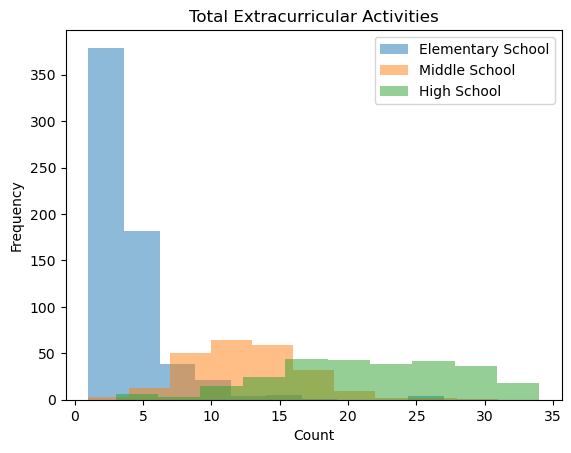

In [98]:
# Sample data for numextracurricular
numextracurricular = np.random.randint(0, 10, size=(100,))
school_levels = ('Elementary School', 'Middle School', 'High School')

# Create separate histograms for each school level
for level in school_levels:
    plt.hist(MIGENEDCOMPLETEWITHECA[MIGENEDCOMPLETEWITHECA[level] == 1]['numextracurricular'], bins=10, alpha=0.5, label=level)

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Total Extracurricular Activities')

# Add legend
plt.legend()

# Show the plot
plt.show()

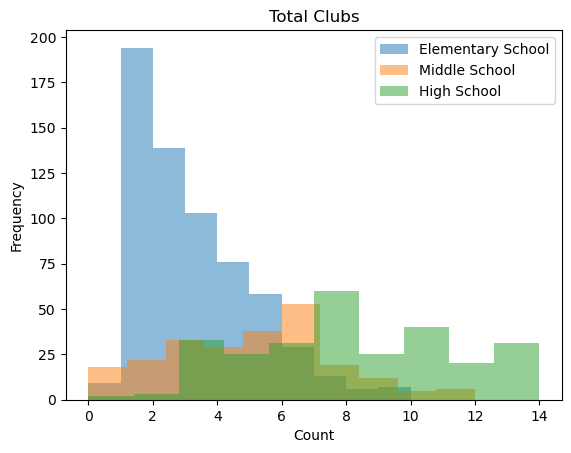

In [99]:
# Sample data for numclubs
numextracurricular = np.random.randint(0, 10, size=(100,))
school_levels = ('Elementary School', 'Middle School', 'High School')

# Create separate histograms for each school level
for level in school_levels:
    plt.hist(MIGENEDCOMPLETEWITHECA[MIGENEDCOMPLETEWITHECA[level] == 1]['numclubs'], bins=10, alpha=0.5, label=level)

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Total Clubs')

# Add legend
plt.legend()

# Show the plot
plt.show()

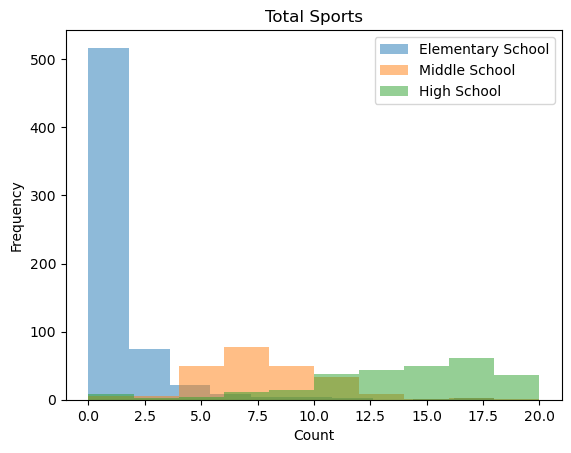

In [100]:
# Sample data for numsports
numextracurricular = np.random.randint(0, 10, size=(100,))
school_levels = ('Elementary School', 'Middle School', 'High School')

# Create separate histograms for each school level
for level in school_levels:
    plt.hist(MIGENEDCOMPLETEWITHECA[MIGENEDCOMPLETEWITHECA[level] == 1]['numsports'], bins=10, alpha=0.5, label=level)

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Total Sports')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Visualizing Type of Extracurricular Activities

“Sports” 

Academics” (Honor Society, Literature and Humanities; Robotics; STEM/STEAM)

“Arts” (Music; Visual Arts)

“Civics” (National or Statewide Leadership Association; Peer Tutoring and Mentoring; Politics and Government; School and Community Organizations; Speech and Debate)

“Vocational” (Career Focus)

In [101]:
# Create new columns with initial values as 0
MIGENEDCOMPLETEWITHECA['EC_Sports'] = 0
MIGENEDCOMPLETEWITHECA['EC_Academics'] = 0
MIGENEDCOMPLETEWITHECA['EC_Arts'] = 0
MIGENEDCOMPLETEWITHECA['EC_Civics'] = 0
MIGENEDCOMPLETEWITHECA['EC_Vocational'] = 0

# Set to 1 if School has a particular type of extracurricular
MIGENEDCOMPLETEWITHECA.loc[(MIGENEDCOMPLETEWITHECA['EC_SPORTS_BASEBALL'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_BSKTBALL'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_BOWLING'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_DIVING'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_COMPCHEER'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_CROSSCNTRY'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_FOOTBALL'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_GOLF'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_GYMNAST'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_ICEHOCKEY'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_OTHSPRTS'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_POWERLIFT'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_SKIING'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_SOFTBALL'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_SOCCER'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_SWIM'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_TENNIS'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_TRCKFIELD'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_VOLBALL'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_SPORTS_WRSTL'] == 1), 'EC_Sports'] = 1
MIGENEDCOMPLETEWITHECA.loc[(MIGENEDCOMPLETEWITHECA['EC_CLUBS_HONSOC'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_CLUBS_LITHUM'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_CLUBS_ROBOTICS'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_CLUBS_STEM'] == 1), 'EC_Academics'] = 1
MIGENEDCOMPLETEWITHECA.loc[(MIGENEDCOMPLETEWITHECA['EC_CLUBS_MUSIC'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_CLUBS_VISARTS'] == 1), 'EC_Arts'] = 1
MIGENEDCOMPLETEWITHECA.loc[(MIGENEDCOMPLETEWITHECA['EC_CLUBS_NSLEAD'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_CLUBS_PEERTUTMEN'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_CLUBS_POLGOV'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_CLUBS_SCHOOLCOM'] == 1) | (MIGENEDCOMPLETEWITHECA['EC_CLUBS_SPCHDEB'] == 1), 'EC_Civics'] = 1
MIGENEDCOMPLETEWITHECA.loc[(MIGENEDCOMPLETEWITHECA['EC_CLUBS_CARFOC'] == 1) , 'EC_Vocational'] = 1


C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\3639242738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MIGENEDCOMPLETEWITHECA['EC_Sports'] = 0
C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\3639242738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MIGENEDCOMPLETEWITHECA['EC_Academics'] = 0
C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\3639242738.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

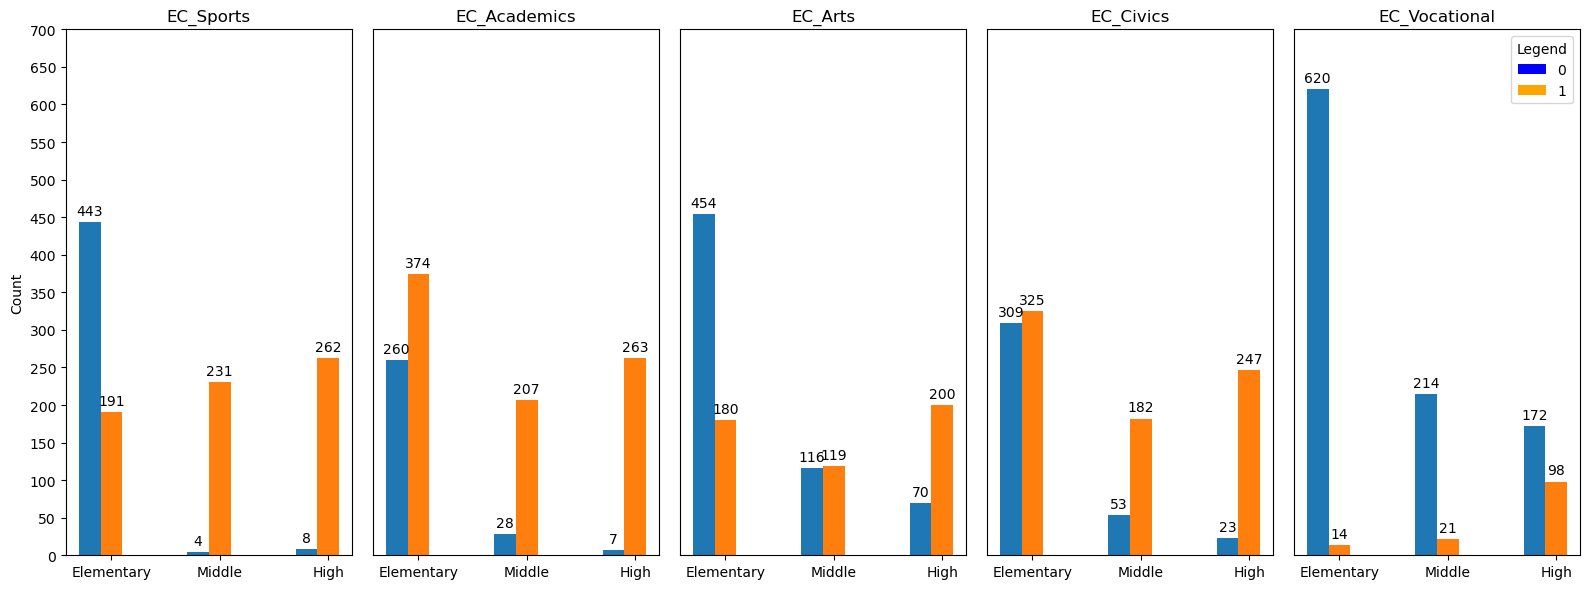

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# List of outcome columns
outcomes = ['EC_Sports', 'EC_Academics', 'EC_Arts', 'EC_Civics', 'EC_Vocational']

# Filter the data to include only the specified school levels
school_levels = ['Elementary School', 'Middle School', 'High School']
filtered_data = MIGENEDCOMPLETEWITHECA[MIGENEDCOMPLETEWITHECA['School Level'].isin(school_levels)]

# Create subplots with one chart for each outcome
fig, axes = plt.subplots(1, len(outcomes), figsize=(16, 6))

# Define the y-axis limits
y_limit = (0, 700)
y_ticks = np.arange(y_limit[0], y_limit[1] + 1, 50)

# Create a dictionary for combined handles and labels
combined_legend = {
    '0': '0',
    '1': '1',
}

for i, outcome in enumerate(outcomes):
    # Group the filtered data by school level ('School Level') and count the occurrences of each activity type
    activity_counts = filtered_data.groupby(['School Level', outcome])[outcome].count().unstack(fill_value=0)

    # Reorder the school levels so that "Middle School" is in the middle
    school_order = ['Elementary School', 'Middle School', 'High School']
    activity_counts = activity_counts.reindex(school_order)

    # Get the labels for the x-axis and relabel school levels
    x_labels = ['Elementary', 'Middle', 'High']

    # Set the bar width and positions
    bar_width = 0.2
    positions = np.arange(len(x_labels))

    # Create side-by-side bar chart for the current outcome
    for j, label in enumerate(activity_counts.columns):
        ax = axes[i]
        bars = ax.bar(positions + j * bar_width, activity_counts[label], bar_width, label=label)

        # Add the count on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                        textcoords="offset points", ha='center', va='bottom')

        # Remove y-axis for subplots 2-5
        if i != 0:
            ax.yaxis.set_visible(False)

    ax.set_title(f'{outcome}')
    ax.set_ylabel('Count')
    ax.set_xticks(positions + 0.2)
    ax.set_xticklabels(x_labels)
    ax.set_yticks(y_ticks)

# Create a single combined legend using proxy artists
legend_elements = [Patch(facecolor='blue', label='0'), Patch(facecolor='orange', label='1')]
plt.legend(handles=legend_elements, title='Legend', loc='upper right')

plt.tight_layout()
plt.show()

# Verifying Accuracy of Extracurricular List

I'll first note solutions that I cannot pursue:
1) Civil Rights Data: Has not provided updates on Interscholastic Athletics since 2017. As a result, it is not well aligned with our data time period. In addition, it only reports out the Number of Single-Sex sports offered and with no specifics on the actual sports. A sport like Golf can have members of all genders participate, and it would potentially be counted as 2 separate single-sex sports if the teams are broken by Male / Female. This would inflate the count. There is also a likelihood of sports that are (generally) offered for only one group (e.g., Cheer and Baseball) that would not allow us to disentangle the numbers provided from the Civil Rights Data.

2) School Websites: Limitation for non-sports extracurricular activities. The most common way for me to verify that there were extracurricular activities for particular schools in the previous search (schools that had voluntary information but no extracurricular activities) was through their athletics offered. Other extracurricular activities were very sparsely listed out on the page, and I had to dig deeply across nearly every possible school link to find them if they existed. This was especially true for Elementary schools. However, athletics for Middle- or High- schools were generally prominently featured on the website and could be identified.

3) Survey Reports by the Michigan High School Athletic Association: Although an initially promising pathway, it appears that the survey results for the MHSAA had a nearly 50% response rate and also featured a range of school types (primary and secondary) as well as public and private. It was unclear how to directly verify the data when it was confounded on many factors.

What are my current proposed solutions?
1) MHSAA has a school look-up: I can select a random sample of schools at each level that offers extracurricular activities, particularly sport extracurricular activities, and check whether all of the listed sports are offered on the MHSAA website. In particular, this may be desirable because MHSAA is the intermediary source for determining athletic eligibliity and competition. Schools must be in compliance with MHSAA in order to compete in sports. However, there is a limitation with this approach - 1) This does not cover extracurricular activities whatsoever. 2) Schools could potentially offer extracurricular activities WITHOUT offering competition for them or being a member of MHSAA. I don't know the degree to which schools are not members of MHSAA if they also participate in sports. However, the plus of using the MHSAA website is that all the schools are easily accessible with all of the sports neatly formatted as opposed to navigating the individual pages of each school website.

2) I could go through the school websites and confirm at least the sports offered by each school and hope that extracurricular offerings are also on there. I suspect that extracurricular activities may not be easily accessible / easily publicly displayed, so there will already be a direct limitation on the approach.

3) I Could systematically send out emails to all principals of schools asking them to verify whether the extracurricular offerings / sports offered at their school is correct and appropriate. This approach of course would potentially suffer according to the response rate and the potential for response rates that are systematically different. 

*I am going to try to do the MHSAA approach. My hope is that if athletics is relatively accurate, then we might also hope that extracurricular activities are also accurate. This is of course contingent on schools filling out both forms.

In [ ]:
YESEXTRACURRICULARLIST = MIGENEDUSCHOOLDATA[MIGENEDUSCHOOLDATA.notnull().all(axis=1)]
YESEXTRACURRICULARLIST = YESEXTRACURRICULARLIST[YESEXTRACURRICULARLIST['voluntary_missing'] == 0]
YESEXTRACURRICULARLIST = YESEXTRACURRICULARLIST[YESEXTRACURRICULARLIST['extracurricular_missing'] == 0]

#While I want to save all of them, I want to also generate a uniform random number
YESEXTRACURRICULARLIST['random_uniform_num'] = YESEXTRACURRICULARLIST.apply(lambda _: np.random.uniform(), axis=1)

#Within Each School Level, identify 25% of the data that have the highest random_uniform_num
top_25_percent = YESEXTRACURRICULARLIST.groupby('School Level').apply(lambda x: x.nlargest(int(len(x) * 0.25), 'random_uniform_num'))
YESEXTRACURRICULARLIST['randomcheck'] = YESEXTRACURRICULARLIST.index.isin(top_25_percent.index.get_level_values(1))

file_name = "C:/Users/johnw/Box/Michigan Parent Dashboard/Michigan Data/raw_yesvolunyeseca_06_26_23.csv"
YESEXTRACURRICULARLIST.to_csv(file_name, index=False)

### Checking Accuracy of Extracurricular Activities

In [103]:
CHECKYESEXTRACURRICULARLIST = pd.read_csv(f"{data_home}/manual_yesvolunyeseca_08_31_23.csv")

In [104]:
CHECKYESEXTRACURRICULARLIST = CHECKYESEXTRACURRICULARLIST[CHECKYESEXTRACURRICULARLIST['randomcheck'] == True]

In [105]:
CHECKYESEXTRACURRICULARLIST = CHECKYESEXTRACURRICULARLIST[CHECKYESEXTRACURRICULARLIST['IGNORE'] == 0]

#### High School

In [106]:
HSCHECKYESEXTRACURRICULARLIST = CHECKYESEXTRACURRICULARLIST[CHECKYESEXTRACURRICULARLIST['School Level'] == 'High School']

In [107]:
HSCHECKYESEXTRACURRICULARLIST

,Unnamed: 0,DistrictCode,District Name,Core Link,School Level,BuildingName_x,School Grade,School Link,Offering Link,ACS_CTE_AGFN,...,VEREC_SPORTS_SOCCER,VEREC_SPORTS_SWIM,VEREC_SPORTS_TENNIS,VEREC_SPORTS_TRCKFIELD,VEREC_SPORTS_VOLBALL,VEREC_SPORTS_WRSTL,EC_FEE,EC_FEE_WAIVER,IGNORE,NO_CLUBS
5,20,3020,Otsego Public Schools,https://legacy.mischooldata.org/ParentDashboar...,High School,Otsego High School,12-Sep,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,NaN
27,51,3080,Saugatuck Public Schools,https://legacy.mischooldata.org/ParentDashboar...,High School,Saugatuck High School,12-Sep,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN
46,140,9030,Bangor Township Schools,https://legacy.mischooldata.org/ParentDashboar...,High School,John Glenn High School,12-Sep,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN
53,162,10015,Benzie County Central Schools,https://legacy.mischooldata.org/ParentDashboar...,High School,Benzie Central Sr. High School,12-Sep,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,1,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,NaN,0.0,NaN
58,177,11010,Benton Harbor Area Schools,https://legacy.mischooldata.org/ParentDashboar...,High School,Benton Harbor High School,12-Sep,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,3302,82015,Detroit Public Schools Community District,https://legacy.mischooldata.org/ParentDashboar...,High School,Detroit School of Arts,12-Sep,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN
1522,3380,82055,Grosse Pointe Public Schools,https://legacy.mischooldata.org/ParentDashboar...,High School,Grosse Pointe North High School,12-Sep,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN
1523,3381,82055,Grosse Pointe Public Schools,https://legacy.mischooldata.org/ParentDashboar...,High School,Grosse Pointe South High School,12-Sep,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN
1616,3603,82390,Northville Public Schools,https://legacy.mischooldata.org/ParentDashboar...,High School,Northville High School,12-Sep,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN


##### CLUBS

In [108]:
VEREC_list = ['VEREC_CLUBS_CARFOC', 'VEREC_CLUBS_GAMES', 'VEREC_CLUBS_HONSOC', 'VEREC_CLUBS_LITHUM', 'VEREC_CLUBS_MUSIC', 'VEREC_CLUBS_NSLEAD', 'VEREC_CLUBS_OTHCLUB', 'VEREC_CLUBS_PEERTUTMEN', 'VEREC_CLUBS_POLGOV', 'VEREC_CLUBS_ROBOTICS', 'VEREC_CLUBS_SCHOOLCOM', 'VEREC_CLUBS_SPCHDEB', 'VEREC_CLUBS_STEM', 'VEREC_CLUBS_VISARTS']
EC_list = ['EC_CLUBS_CARFOC', 'EC_CLUBS_GAMES', 'EC_CLUBS_HONSOC', 'EC_CLUBS_LITHUM', 'EC_CLUBS_MUSIC', 'EC_CLUBS_NSLEAD', 'EC_CLUBS_OTHCLUB', 'EC_CLUBS_PEERTUTMEN', 'EC_CLUBS_POLGOV', 'EC_CLUBS_ROBOTICS', 'EC_CLUBS_SCHOOLCOM', 'EC_CLUBS_SPCHDEB', 'EC_CLUBS_STEM', 'EC_CLUBS_VISARTS']

for col_verec, col_ec in zip(VEREC_list, EC_list):
    col_name = col_verec.replace("VEREC_CLUBS_", "CHECK_")
    HSCHECKYESEXTRACURRICULARLIST[col_name] = HSCHECKYESEXTRACURRICULARLIST[col_verec] - HSCHECKYESEXTRACURRICULARLIST[col_ec]

C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\2363818696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HSCHECKYESEXTRACURRICULARLIST[col_name] = HSCHECKYESEXTRACURRICULARLIST[col_verec] - HSCHECKYESEXTRACURRICULARLIST[col_ec]
C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\2363818696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HSCHECKYESEXTRACURRICULARLIST[col_name] = HSCHECKYESEXTRACURRICULARLIST[col_verec] - HSCHECKYESEXTRACURRICULARLIST[col_ec]
C:\Users\johnw\AppData\Local\Temp\ipyker

In [109]:
#Checking How many Missing for each
CHECK_CLUBS_list = ['CHECK_CARFOC', 'CHECK_GAMES', 'CHECK_HONSOC', 'CHECK_LITHUM', 'CHECK_MUSIC', 'CHECK_NSLEAD', 'CHECK_OTHCLUB', 'CHECK_PEERTUTMEN', 'CHECK_POLGOV', 'CHECK_ROBOTICS', 'CHECK_SCHOOLCOM', 'CHECK_SPCHDEB', 'CHECK_STEM', 'CHECK_VISARTS']

#1's indicate that our verification check found this club, and it was not in the Parent Dashboard
#0's indicate that our verification check MATCHED the Parent Dashboard
#-1's indicate that our verification check did NOT find this club, but it was ON the Parent Dashboard

percentages = []  # List to store the percentages

for check in CHECK_CLUBS_list:   
    unique_values = HSCHECKYESEXTRACURRICULARLIST[check].unique()
    value_counts = HSCHECKYESEXTRACURRICULARLIST[check].value_counts()
    print(f"Column: {check}")
    print("Value Counts:")
    print(value_counts)
    
    zero_count = value_counts.get(0, 0)  # Get the count of zeros, defaulting to 0 if not found
    total_count = len(HSCHECKYESEXTRACURRICULARLIST)
    percentage = zero_count / total_count * 100
    percentages.append(percentage)  # Add the percentage to the list
    print(f"Percentage of values equal to zero: {percentage:.2f}%")

    #print(f"Percentage of values equal to zero: {percentage:.2f}%")
    print()
    
#Final Average Accuracy
average_percentage = sum(percentages) / len(percentages)  # Calculate the average percentage

print(f"Average percentage of values equal to zero: {average_percentage:.2f}%")

Column: CHECK_CARFOC
Value Counts:
 0.0    52
 1.0    11
-1.0     4
Name: CHECK_CARFOC, dtype: int64
Percentage of values equal to zero: 77.61%

Column: CHECK_GAMES
Value Counts:
 0.0    59
-1.0     4
 1.0     4
Name: CHECK_GAMES, dtype: int64
Percentage of values equal to zero: 88.06%

Column: CHECK_HONSOC
Value Counts:
 0.0    62
-1.0     3
 1.0     2
Name: CHECK_HONSOC, dtype: int64
Percentage of values equal to zero: 92.54%

Column: CHECK_LITHUM
Value Counts:
0.0    53
1.0    14
Name: CHECK_LITHUM, dtype: int64
Percentage of values equal to zero: 79.10%

Column: CHECK_MUSIC
Value Counts:
 0.0    60
 1.0     6
-1.0     1
Name: CHECK_MUSIC, dtype: int64
Percentage of values equal to zero: 89.55%

Column: CHECK_NSLEAD
Value Counts:
 0.0    62
-1.0     5
Name: CHECK_NSLEAD, dtype: int64
Percentage of values equal to zero: 92.54%

Column: CHECK_OTHCLUB
Value Counts:
0.0    58
1.0     9
Name: CHECK_OTHCLUB, dtype: int64
Percentage of values equal to zero: 86.57%

Column: CHECK_PEERTUTMEN

##### SPORTS

In [110]:
VEREC_list2 = ['VEREC_SPORTS_BASEBALL', 'VEREC_SPORTS_BSKTBALL', 'VEREC_SPORTS_BOWLING', 'VEREC_SPORTS_DIVING', 'VEREC_SPORTS_COMPCHEER', 'VEREC_SPORTS_CROSSCNTRY', 'VEREC_SPORTS_FOOTBALL', 'VEREC_SPORTS_GOLF', 'VEREC_SPORTS_GYMNAST', 'VEREC_SPORTS_ICEHOCKEY', 'VEREC_SPORTS_OTHSPRTS', 'VEREC_SPORTS_POWERLIFT', 'VEREC_SPORTS_SKIING', 'VEREC_SPORTS_SOFTBALL', 'VEREC_SPORTS_SOCCER', 'VEREC_SPORTS_SWIM', 'VEREC_SPORTS_TENNIS', 'VEREC_SPORTS_TRCKFIELD', 'VEREC_SPORTS_VOLBALL', 'VEREC_SPORTS_WRSTL']
EC_list2 = ['EC_SPORTS_BASEBALL', 'EC_SPORTS_BSKTBALL', 'EC_SPORTS_BOWLING', 'EC_SPORTS_DIVING', 'EC_SPORTS_COMPCHEER', 'EC_SPORTS_CROSSCNTRY', 'EC_SPORTS_FOOTBALL', 'EC_SPORTS_GOLF', 'EC_SPORTS_GYMNAST', 'EC_SPORTS_ICEHOCKEY', 'EC_SPORTS_OTHSPRTS', 'EC_SPORTS_POWERLIFT', 'EC_SPORTS_SKIING', 'EC_SPORTS_SOFTBALL', 'EC_SPORTS_SOCCER', 'EC_SPORTS_SWIM', 'EC_SPORTS_TENNIS', 'EC_SPORTS_TRCKFIELD', 'EC_SPORTS_VOLBALL', 'EC_SPORTS_WRSTL']

for col_verec, col_ec in zip(VEREC_list2, EC_list2):
    col_name = col_verec.replace("VEREC_SPORTS_", "CHECK_")
    HSCHECKYESEXTRACURRICULARLIST[col_name] = HSCHECKYESEXTRACURRICULARLIST[col_verec] - HSCHECKYESEXTRACURRICULARLIST[col_ec]

C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\1523225347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HSCHECKYESEXTRACURRICULARLIST[col_name] = HSCHECKYESEXTRACURRICULARLIST[col_verec] - HSCHECKYESEXTRACURRICULARLIST[col_ec]
C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\1523225347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HSCHECKYESEXTRACURRICULARLIST[col_name] = HSCHECKYESEXTRACURRICULARLIST[col_verec] - HSCHECKYESEXTRACURRICULARLIST[col_ec]
C:\Users\johnw\AppData\Local\Temp\ipyker

In [111]:
#Checking How many Missing for each
CHECK_SPORTS_list = ['CHECK_BASEBALL', 'CHECK_BSKTBALL', 'CHECK_BOWLING', 'CHECK_DIVING', 'CHECK_COMPCHEER', 'CHECK_CROSSCNTRY', 'CHECK_FOOTBALL', 'CHECK_GOLF', 'CHECK_GYMNAST', 'CHECK_ICEHOCKEY', 'CHECK_OTHSPRTS', 'CHECK_POWERLIFT', 'CHECK_SKIING', 'CHECK_SOFTBALL', 'CHECK_SOCCER', 'CHECK_SWIM', 'CHECK_TENNIS', 'CHECK_TRCKFIELD', 'CHECK_VOLBALL', 'CHECK_WRSTL']

#1's indicate that our verification check found this sport, and it was not in the Parent Dashboard
#0's indicate that our verification check MATCHED the Parent Dashboard
#-1's indicate that our verification check did NOT find this sport, but it was ON the Parent Dashboard

percentages = []  # List to store the percentages

for check in CHECK_SPORTS_list:   
    unique_values = HSCHECKYESEXTRACURRICULARLIST[check].unique()
    value_counts = HSCHECKYESEXTRACURRICULARLIST[check].value_counts()
    print(f"Column: {check}")
    print("Value Counts:")
    print(value_counts)
    
    zero_count = value_counts.get(0, 0)  # Get the count of zeros, defaulting to 0 if not found
    total_count = len(HSCHECKYESEXTRACURRICULARLIST)
    percentage = zero_count / total_count * 100
    percentages.append(percentage)  # Add the percentage to the list
    print(f"Percentage of values equal to zero: {percentage:.2f}%")

    #print(f"Percentage of values equal to zero: {percentage:.2f}%")
    print()
    
#Final Average Accuracy
average_percentage = sum(percentages) / len(percentages)  # Calculate the average percentage

print(f"Average percentage of values equal to zero: {average_percentage:.2f}%")

Column: CHECK_BASEBALL
Value Counts:
0.0    67
Name: CHECK_BASEBALL, dtype: int64
Percentage of values equal to zero: 100.00%

Column: CHECK_BSKTBALL
Value Counts:
0.0    67
Name: CHECK_BSKTBALL, dtype: int64
Percentage of values equal to zero: 100.00%

Column: CHECK_BOWLING
Value Counts:
 0.0    60
 1.0     6
-1.0     1
Name: CHECK_BOWLING, dtype: int64
Percentage of values equal to zero: 89.55%

Column: CHECK_DIVING
Value Counts:
0.0    58
1.0     9
Name: CHECK_DIVING, dtype: int64
Percentage of values equal to zero: 86.57%

Column: CHECK_COMPCHEER
Value Counts:
 0.0    62
 1.0     3
-1.0     2
Name: CHECK_COMPCHEER, dtype: int64
Percentage of values equal to zero: 92.54%

Column: CHECK_CROSSCNTRY
Value Counts:
 0.0    63
 1.0     2
-1.0     2
Name: CHECK_CROSSCNTRY, dtype: int64
Percentage of values equal to zero: 94.03%

Column: CHECK_FOOTBALL
Value Counts:
0.0    67
Name: CHECK_FOOTBALL, dtype: int64
Percentage of values equal to zero: 100.00%

Column: CHECK_GOLF
Value Counts:
 0.

##### OVERALL

In [112]:
#Checking How many Missing for each
CHECK_OVERALL_list = ['CHECK_CARFOC', 'CHECK_GAMES', 'CHECK_HONSOC', 'CHECK_LITHUM', 'CHECK_MUSIC', 'CHECK_NSLEAD', 'CHECK_OTHCLUB', 'CHECK_PEERTUTMEN', 'CHECK_POLGOV', 'CHECK_ROBOTICS', 'CHECK_SCHOOLCOM', 'CHECK_SPCHDEB', 'CHECK_STEM', 'CHECK_VISARTS', 'CHECK_BASEBALL', 'CHECK_BSKTBALL', 'CHECK_BOWLING', 'CHECK_DIVING', 'CHECK_COMPCHEER', 'CHECK_CROSSCNTRY', 'CHECK_FOOTBALL', 'CHECK_GOLF', 'CHECK_GYMNAST', 'CHECK_ICEHOCKEY', 'CHECK_OTHSPRTS', 'CHECK_POWERLIFT', 'CHECK_SKIING', 'CHECK_SOFTBALL', 'CHECK_SOCCER', 'CHECK_SWIM', 'CHECK_TENNIS', 'CHECK_TRCKFIELD', 'CHECK_VOLBALL', 'CHECK_WRSTL']

nosketchypercentages = []  # List to store the percentages

for check in CHECK_OVERALL_list:   
    unique_values = HSCHECKYESEXTRACURRICULARLIST[check].unique()
    value_counts = HSCHECKYESEXTRACURRICULARLIST[check].value_counts()
    zero_count = value_counts.get(0, 0)  # Get the count of zeros, defaulting to 0 if not found
    total_count = len(HSCHECKYESEXTRACURRICULARLIST)
    percentage = zero_count / total_count * 100
    nosketchypercentages.append(percentage)  # Add the percentage to the list
    
#Final Average Accuracy
average_percentage = sum(nosketchypercentages) / len(nosketchypercentages)  # Calculate the average percentage

print(f"Average percentage of values equal to zero: {average_percentage:.2f}%")

Average percentage of values equal to zero: 90.61%


#### Middle School

In [113]:
MSCHECKYESEXTRACURRICULARLIST = CHECKYESEXTRACURRICULARLIST[CHECKYESEXTRACURRICULARLIST['School Level'] == 'Middle School']

In [114]:
MSCHECKYESEXTRACURRICULARLIST

,Unnamed: 0,DistrictCode,District Name,Core Link,School Level,BuildingName_x,School Grade,School Link,Offering Link,ACS_CTE_AGFN,...,VEREC_SPORTS_SOCCER,VEREC_SPORTS_SWIM,VEREC_SPORTS_TENNIS,VEREC_SPORTS_TRCKFIELD,VEREC_SPORTS_VOLBALL,VEREC_SPORTS_WRSTL,EC_FEE,EC_FEE_WAIVER,IGNORE,NO_CLUBS
10,29,3030,Allegan Public Schools,https://legacy.mischooldata.org/ParentDashboar...,Middle School,L.E. White Middle School,8-Jun,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN
28,70,4010,Alpena Public Schools,https://legacy.mischooldata.org/ParentDashboar...,Middle School,Thunder Bay Junior High School,8-Jun,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN
52,160,10015,Benzie County Central Schools,https://legacy.mischooldata.org/ParentDashboar...,Middle School,Benzie Central Middle School,8-Jun,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,1.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN
76,204,11240,Berrien Springs Public Schools,https://legacy.mischooldata.org/ParentDashboar...,Middle School,Berrien Springs Middle School,8-Jun,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN
90,245,11320,Watervliet School District,https://legacy.mischooldata.org/ParentDashboar...,Middle School,Watervliet Middle School,8-Jun,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,1.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN
114,292,13020,Battle Creek Public Schools,https://legacy.mischooldata.org/ParentDashboar...,Middle School,Northwestern Middle School,8-Jun,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN
170,446,19120,Ovid-Elsie Area Schools,https://legacy.mischooldata.org/ParentDashboar...,Middle School,Ovid-Elsie Middle School,8-Jun,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN
206,522,23050,Eaton Rapids Public Schools,https://legacy.mischooldata.org/ParentDashboar...,Middle School,Eaton Rapids Middle School,8-Jun,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN
289,744,26040,Gladwin Community Schools,https://legacy.mischooldata.org/ParentDashboar...,Middle School,Gladwin Junior High School,8-Jun,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN
301,776,28010,Traverse City Area Public Schools,https://legacy.mischooldata.org/ParentDashboar...,Middle School,East Middle School,8-Jun,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN


##### CLUBS

In [115]:
VEREC_list3 = ['VEREC_CLUBS_CARFOC', 'VEREC_CLUBS_GAMES', 'VEREC_CLUBS_HONSOC', 'VEREC_CLUBS_LITHUM', 'VEREC_CLUBS_MUSIC', 'VEREC_CLUBS_NSLEAD', 'VEREC_CLUBS_OTHCLUB', 'VEREC_CLUBS_PEERTUTMEN', 'VEREC_CLUBS_POLGOV', 'VEREC_CLUBS_ROBOTICS', 'VEREC_CLUBS_SCHOOLCOM', 'VEREC_CLUBS_SPCHDEB', 'VEREC_CLUBS_STEM', 'VEREC_CLUBS_VISARTS']
EC_list3 = ['EC_CLUBS_CARFOC', 'EC_CLUBS_GAMES', 'EC_CLUBS_HONSOC', 'EC_CLUBS_LITHUM', 'EC_CLUBS_MUSIC', 'EC_CLUBS_NSLEAD', 'EC_CLUBS_OTHCLUB', 'EC_CLUBS_PEERTUTMEN', 'EC_CLUBS_POLGOV', 'EC_CLUBS_ROBOTICS', 'EC_CLUBS_SCHOOLCOM', 'EC_CLUBS_SPCHDEB', 'EC_CLUBS_STEM', 'EC_CLUBS_VISARTS']

for col_verec, col_ec in zip(VEREC_list3, EC_list3):
    col_name = col_verec.replace("VEREC_CLUBS_", "CHECK_")
    MSCHECKYESEXTRACURRICULARLIST[col_name] = MSCHECKYESEXTRACURRICULARLIST[col_verec] - MSCHECKYESEXTRACURRICULARLIST[col_ec]

C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\1281359977.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSCHECKYESEXTRACURRICULARLIST[col_name] = MSCHECKYESEXTRACURRICULARLIST[col_verec] - MSCHECKYESEXTRACURRICULARLIST[col_ec]
C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\1281359977.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSCHECKYESEXTRACURRICULARLIST[col_name] = MSCHECKYESEXTRACURRICULARLIST[col_verec] - MSCHECKYESEXTRACURRICULARLIST[col_ec]
C:\Users\johnw\AppData\Local\Temp\ipyker

In [116]:
#Checking How many Missing for each
CHECK_CLUBS_list = ['CHECK_CARFOC', 'CHECK_GAMES', 'CHECK_HONSOC', 'CHECK_LITHUM', 'CHECK_MUSIC', 'CHECK_NSLEAD', 'CHECK_OTHCLUB', 'CHECK_PEERTUTMEN', 'CHECK_POLGOV', 'CHECK_ROBOTICS', 'CHECK_SCHOOLCOM', 'CHECK_SPCHDEB', 'CHECK_STEM', 'CHECK_VISARTS']

#1's indicate that our verification check found this club, and it was not in the Parent Dashboard
#0's indicate that our verification check MATCHED the Parent Dashboard
#-1's indicate that our verification check did NOT find this club, but it was ON the Parent Dashboard

percentages = []  # List to store the percentages

for check in CHECK_CLUBS_list:   
    unique_values = MSCHECKYESEXTRACURRICULARLIST[check].unique()
    value_counts = MSCHECKYESEXTRACURRICULARLIST[check].value_counts()
    print(f"Column: {check}")
    print("Value Counts:")
    print(value_counts)
    
    zero_count = value_counts.get(0, 0)  # Get the count of zeros, defaulting to 0 if not found
    total_count = len(MSCHECKYESEXTRACURRICULARLIST)
    percentage = zero_count / total_count * 100
    percentages.append(percentage)  # Add the percentage to the list
    print(f"Percentage of values equal to zero: {percentage:.2f}%")

    #print(f"Percentage of values equal to zero: {percentage:.2f}%")
    print()
    
#Final Average Accuracy
average_percentage = sum(percentages) / len(percentages)  # Calculate the average percentage

print(f"Average percentage of values equal to zero: {average_percentage:.2f}%")

Column: CHECK_CARFOC
Value Counts:
 0.0    54
-1.0     4
Name: CHECK_CARFOC, dtype: int64
Percentage of values equal to zero: 93.10%

Column: CHECK_GAMES
Value Counts:
 0.0    46
 1.0     6
-1.0     6
Name: CHECK_GAMES, dtype: int64
Percentage of values equal to zero: 79.31%

Column: CHECK_HONSOC
Value Counts:
 0.0    55
-1.0     2
 1.0     1
Name: CHECK_HONSOC, dtype: int64
Percentage of values equal to zero: 94.83%

Column: CHECK_LITHUM
Value Counts:
0.0    54
1.0     4
Name: CHECK_LITHUM, dtype: int64
Percentage of values equal to zero: 93.10%

Column: CHECK_MUSIC
Value Counts:
 0.0    50
 1.0     7
-1.0     1
Name: CHECK_MUSIC, dtype: int64
Percentage of values equal to zero: 86.21%

Column: CHECK_NSLEAD
Value Counts:
 0.0    50
-1.0     8
Name: CHECK_NSLEAD, dtype: int64
Percentage of values equal to zero: 86.21%

Column: CHECK_OTHCLUB
Value Counts:
 0.0    50
 1.0     7
-1.0     1
Name: CHECK_OTHCLUB, dtype: int64
Percentage of values equal to zero: 86.21%

Column: CHECK_PEERTUTM

##### SPORTS

In [117]:
VEREC_list4 = ['VEREC_SPORTS_BASEBALL', 'VEREC_SPORTS_BSKTBALL', 'VEREC_SPORTS_BOWLING', 'VEREC_SPORTS_DIVING', 'VEREC_SPORTS_COMPCHEER', 'VEREC_SPORTS_CROSSCNTRY', 'VEREC_SPORTS_FOOTBALL', 'VEREC_SPORTS_GOLF', 'VEREC_SPORTS_GYMNAST', 'VEREC_SPORTS_ICEHOCKEY', 'VEREC_SPORTS_OTHSPRTS', 'VEREC_SPORTS_POWERLIFT', 'VEREC_SPORTS_SKIING', 'VEREC_SPORTS_SOFTBALL', 'VEREC_SPORTS_SOCCER', 'VEREC_SPORTS_SWIM', 'VEREC_SPORTS_TENNIS', 'VEREC_SPORTS_TRCKFIELD', 'VEREC_SPORTS_VOLBALL', 'VEREC_SPORTS_WRSTL']
EC_list4 = ['EC_SPORTS_BASEBALL', 'EC_SPORTS_BSKTBALL', 'EC_SPORTS_BOWLING', 'EC_SPORTS_DIVING', 'EC_SPORTS_COMPCHEER', 'EC_SPORTS_CROSSCNTRY', 'EC_SPORTS_FOOTBALL', 'EC_SPORTS_GOLF', 'EC_SPORTS_GYMNAST', 'EC_SPORTS_ICEHOCKEY', 'EC_SPORTS_OTHSPRTS', 'EC_SPORTS_POWERLIFT', 'EC_SPORTS_SKIING', 'EC_SPORTS_SOFTBALL', 'EC_SPORTS_SOCCER', 'EC_SPORTS_SWIM', 'EC_SPORTS_TENNIS', 'EC_SPORTS_TRCKFIELD', 'EC_SPORTS_VOLBALL', 'EC_SPORTS_WRSTL']

for col_verec, col_ec in zip(VEREC_list4, EC_list4):
    col_name = col_verec.replace("VEREC_SPORTS_", "CHECK_")
    MSCHECKYESEXTRACURRICULARLIST[col_name] = MSCHECKYESEXTRACURRICULARLIST[col_verec] - MSCHECKYESEXTRACURRICULARLIST[col_ec]

C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\2574286143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSCHECKYESEXTRACURRICULARLIST[col_name] = MSCHECKYESEXTRACURRICULARLIST[col_verec] - MSCHECKYESEXTRACURRICULARLIST[col_ec]
C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\2574286143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSCHECKYESEXTRACURRICULARLIST[col_name] = MSCHECKYESEXTRACURRICULARLIST[col_verec] - MSCHECKYESEXTRACURRICULARLIST[col_ec]
C:\Users\johnw\AppData\Local\Temp\ipyker

In [118]:
#Checking How many Missing for each
CHECK_SPORTS_list = ['CHECK_BASEBALL', 'CHECK_BSKTBALL', 'CHECK_BOWLING', 'CHECK_DIVING', 'CHECK_COMPCHEER', 'CHECK_CROSSCNTRY', 'CHECK_FOOTBALL', 'CHECK_GOLF', 'CHECK_GYMNAST', 'CHECK_ICEHOCKEY', 'CHECK_OTHSPRTS', 'CHECK_POWERLIFT', 'CHECK_SKIING', 'CHECK_SOFTBALL', 'CHECK_SOCCER', 'CHECK_SWIM', 'CHECK_TENNIS', 'CHECK_TRCKFIELD', 'CHECK_VOLBALL', 'CHECK_WRSTL']

#1's indicate that our verification check found this sport, and it was not in the Parent Dashboard
#0's indicate that our verification check MATCHED the Parent Dashboard
#-1's indicate that our verification check did NOT find this sport, but it was ON the Parent Dashboard

percentages = []  # List to store the percentages

for check in CHECK_SPORTS_list:   
    unique_values = MSCHECKYESEXTRACURRICULARLIST[check].unique()
    value_counts = MSCHECKYESEXTRACURRICULARLIST[check].value_counts()
    print(f"Column: {check}")
    print("Value Counts:")
    print(value_counts)
    
    zero_count = value_counts.get(0, 0)  # Get the count of zeros, defaulting to 0 if not found
    total_count = len(MSCHECKYESEXTRACURRICULARLIST)
    percentage = zero_count / total_count * 100
    percentages.append(percentage)  # Add the percentage to the list
    print(f"Percentage of values equal to zero: {percentage:.2f}%")

    #print(f"Percentage of values equal to zero: {percentage:.2f}%")
    print()
    
#Final Average Accuracy
average_percentage = sum(percentages) / len(percentages)  # Calculate the average percentage

print(f"Average percentage of values equal to zero: {average_percentage:.2f}%")

Column: CHECK_BASEBALL
Value Counts:
 0.0    51
-1.0     5
 1.0     2
Name: CHECK_BASEBALL, dtype: int64
Percentage of values equal to zero: 87.93%

Column: CHECK_BSKTBALL
Value Counts:
 0.0    52
 1.0     4
-1.0     2
Name: CHECK_BSKTBALL, dtype: int64
Percentage of values equal to zero: 89.66%

Column: CHECK_BOWLING
Value Counts:
 0.0    55
-1.0     3
Name: CHECK_BOWLING, dtype: int64
Percentage of values equal to zero: 94.83%

Column: CHECK_DIVING
Value Counts:
 0.0    52
-1.0     5
 1.0     1
Name: CHECK_DIVING, dtype: int64
Percentage of values equal to zero: 89.66%

Column: CHECK_COMPCHEER
Value Counts:
 0.0    43
-1.0     8
 1.0     7
Name: CHECK_COMPCHEER, dtype: int64
Percentage of values equal to zero: 74.14%

Column: CHECK_CROSSCNTRY
Value Counts:
 0.0    47
-1.0     7
 1.0     4
Name: CHECK_CROSSCNTRY, dtype: int64
Percentage of values equal to zero: 81.03%

Column: CHECK_FOOTBALL
Value Counts:
 0.0    51
-1.0     4
 1.0     3
Name: CHECK_FOOTBALL, dtype: int64
Percentage o

##### OVERALL

In [119]:
#Checking How many Missing for each
CHECK_OVERALL_list = ['CHECK_CARFOC', 'CHECK_GAMES', 'CHECK_HONSOC', 'CHECK_LITHUM', 'CHECK_MUSIC', 'CHECK_NSLEAD', 'CHECK_OTHCLUB', 'CHECK_PEERTUTMEN', 'CHECK_POLGOV', 'CHECK_ROBOTICS', 'CHECK_SCHOOLCOM', 'CHECK_SPCHDEB', 'CHECK_STEM', 'CHECK_VISARTS', 'CHECK_BASEBALL', 'CHECK_BSKTBALL', 'CHECK_BOWLING', 'CHECK_DIVING', 'CHECK_COMPCHEER', 'CHECK_CROSSCNTRY', 'CHECK_FOOTBALL', 'CHECK_GOLF', 'CHECK_GYMNAST', 'CHECK_ICEHOCKEY', 'CHECK_OTHSPRTS', 'CHECK_POWERLIFT', 'CHECK_SKIING', 'CHECK_SOFTBALL', 'CHECK_SOCCER', 'CHECK_SWIM', 'CHECK_TENNIS', 'CHECK_TRCKFIELD', 'CHECK_VOLBALL', 'CHECK_WRSTL']

nosketchypercentages = []  # List to store the percentages

for check in CHECK_OVERALL_list:   
    unique_values = MSCHECKYESEXTRACURRICULARLIST[check].unique()
    value_counts = MSCHECKYESEXTRACURRICULARLIST[check].value_counts()
    zero_count = value_counts.get(0, 0)  # Get the count of zeros, defaulting to 0 if not found
    total_count = len(MSCHECKYESEXTRACURRICULARLIST)
    percentage = zero_count / total_count * 100
    nosketchypercentages.append(percentage)  # Add the percentage to the list
    
#Final Average Accuracy
average_percentage = sum(nosketchypercentages) / len(nosketchypercentages)  # Calculate the average percentage

print(f"Average percentage of values equal to zero: {average_percentage:.2f}%")

Average percentage of values equal to zero: 88.34%


#### Elementary School

In [120]:
ESCHECKYESEXTRACURRICULARLIST = CHECKYESEXTRACURRICULARLIST[CHECKYESEXTRACURRICULARLIST['School Level'] == 'Elementary School']

In [121]:
ESCHECKYESEXTRACURRICULARLIST

,Unnamed: 0,DistrictCode,District Name,Core Link,School Level,BuildingName_x,School Grade,School Link,Offering Link,ACS_CTE_AGFN,...,VEREC_SPORTS_SOCCER,VEREC_SPORTS_SWIM,VEREC_SPORTS_TENNIS,VEREC_SPORTS_TRCKFIELD,VEREC_SPORTS_VOLBALL,VEREC_SPORTS_WRSTL,EC_FEE,EC_FEE_WAIVER,IGNORE,NO_CLUBS
15,35,3040,Wayland Union Schools,https://legacy.mischooldata.org/ParentDashboar...,Elementary School,R.J. Steeby School,3-Feb,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
43,136,9030,Bangor Township Schools,https://legacy.mischooldata.org/ParentDashboar...,Elementary School,Bangor Lincoln School,K-5,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
61,181,11020,St. Joseph Public Schools,https://legacy.mischooldata.org/ParentDashboar...,Elementary School,Lincoln School,K-5,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
81,224,11300,Niles Community Schools,https://legacy.mischooldata.org/ParentDashboar...,Elementary School,Ballard Elementary School,K-5,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
88,243,11320,Watervliet School District,https://legacy.mischooldata.org/ParentDashboar...,Elementary School,North Elementary School,5-Mar,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,3623,82430,Van Buren Public Schools,https://legacy.mischooldata.org/ParentDashboar...,Elementary School,Edgemont Elementary School,K-5,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
1648,3708,82921,Academy for Business and Technology,https://legacy.mischooldata.org/ParentDashboar...,Elementary School,Academy for Business and Technology Elementary,K-5,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN
1658,3724,82938,Summit Academy North,https://legacy.mischooldata.org/ParentDashboar...,Elementary School,Summit Academy North Elementary School,K-5,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,NaN
1679,3784,83010,Cadillac Area Public Schools,https://legacy.mischooldata.org/ParentDashboar...,Elementary School,Franklin Elementary School,K-5,https://legacy.mischooldata.org/ParentDashboar...,https://legacy.mischooldata.org/ParentDashboar...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN


##### CLUBS

In [122]:
VEREC_list5 = ['VEREC_CLUBS_CARFOC', 'VEREC_CLUBS_GAMES', 'VEREC_CLUBS_HONSOC', 'VEREC_CLUBS_LITHUM', 'VEREC_CLUBS_MUSIC', 'VEREC_CLUBS_NSLEAD', 'VEREC_CLUBS_OTHCLUB', 'VEREC_CLUBS_PEERTUTMEN', 'VEREC_CLUBS_POLGOV', 'VEREC_CLUBS_ROBOTICS', 'VEREC_CLUBS_SCHOOLCOM', 'VEREC_CLUBS_SPCHDEB', 'VEREC_CLUBS_STEM', 'VEREC_CLUBS_VISARTS']
EC_list5 = ['EC_CLUBS_CARFOC', 'EC_CLUBS_GAMES', 'EC_CLUBS_HONSOC', 'EC_CLUBS_LITHUM', 'EC_CLUBS_MUSIC', 'EC_CLUBS_NSLEAD', 'EC_CLUBS_OTHCLUB', 'EC_CLUBS_PEERTUTMEN', 'EC_CLUBS_POLGOV', 'EC_CLUBS_ROBOTICS', 'EC_CLUBS_SCHOOLCOM', 'EC_CLUBS_SPCHDEB', 'EC_CLUBS_STEM', 'EC_CLUBS_VISARTS']

for col_verec, col_ec in zip(VEREC_list5, EC_list5):
    col_name = col_verec.replace("VEREC_CLUBS_", "CHECK_")
    ESCHECKYESEXTRACURRICULARLIST[col_name] = ESCHECKYESEXTRACURRICULARLIST[col_verec] - ESCHECKYESEXTRACURRICULARLIST[col_ec]

C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\4261730580.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESCHECKYESEXTRACURRICULARLIST[col_name] = ESCHECKYESEXTRACURRICULARLIST[col_verec] - ESCHECKYESEXTRACURRICULARLIST[col_ec]
C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\4261730580.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESCHECKYESEXTRACURRICULARLIST[col_name] = ESCHECKYESEXTRACURRICULARLIST[col_verec] - ESCHECKYESEXTRACURRICULARLIST[col_ec]
C:\Users\johnw\AppData\Local\Temp\ipyker

In [123]:
#Checking How many Missing for each
CHECK_CLUBS_list = ['CHECK_CARFOC', 'CHECK_GAMES', 'CHECK_HONSOC', 'CHECK_LITHUM', 'CHECK_MUSIC', 'CHECK_NSLEAD', 'CHECK_OTHCLUB', 'CHECK_PEERTUTMEN', 'CHECK_POLGOV', 'CHECK_ROBOTICS', 'CHECK_SCHOOLCOM', 'CHECK_SPCHDEB', 'CHECK_STEM', 'CHECK_VISARTS']

#1's indicate that our verification check found this club, and it was not in the Parent Dashboard
#0's indicate that our verification check MATCHED the Parent Dashboard
#-1's indicate that our verification check did NOT find this club, but it was ON the Parent Dashboard

percentages = []  # List to store the percentages

for check in CHECK_CLUBS_list:   
    unique_values = ESCHECKYESEXTRACURRICULARLIST[check].unique()
    value_counts = ESCHECKYESEXTRACURRICULARLIST[check].value_counts()
    print(f"Column: {check}")
    print("Value Counts:")
    print(value_counts)
    
    zero_count = value_counts.get(0, 0)  # Get the count of zeros, defaulting to 0 if not found
    total_count = len(ESCHECKYESEXTRACURRICULARLIST)
    percentage = zero_count / total_count * 100
    percentages.append(percentage)  # Add the percentage to the list
    print(f"Percentage of values equal to zero: {percentage:.2f}%")

    #print(f"Percentage of values equal to zero: {percentage:.2f}%")
    print()
    
#Final Average Accuracy
average_percentage = sum(percentages) / len(percentages)  # Calculate the average percentage

print(f"Average percentage of values equal to zero: {average_percentage:.2f}%")

Column: CHECK_CARFOC
Value Counts:
 0.0    146
-1.0      3
 1.0      1
Name: CHECK_CARFOC, dtype: int64
Percentage of values equal to zero: 97.33%

Column: CHECK_GAMES
Value Counts:
 0.0    135
-1.0     11
 1.0      4
Name: CHECK_GAMES, dtype: int64
Percentage of values equal to zero: 90.00%

Column: CHECK_HONSOC
Value Counts:
 0.0    148
 1.0      1
-1.0      1
Name: CHECK_HONSOC, dtype: int64
Percentage of values equal to zero: 98.67%

Column: CHECK_LITHUM
Value Counts:
0.0    140
1.0     10
Name: CHECK_LITHUM, dtype: int64
Percentage of values equal to zero: 93.33%

Column: CHECK_MUSIC
Value Counts:
 0.0    131
-1.0     10
 1.0      9
Name: CHECK_MUSIC, dtype: int64
Percentage of values equal to zero: 87.33%

Column: CHECK_NSLEAD
Value Counts:
 0.0    146
-1.0      4
Name: CHECK_NSLEAD, dtype: int64
Percentage of values equal to zero: 97.33%

Column: CHECK_OTHCLUB
Value Counts:
 0.0    117
-1.0     26
 1.0      7
Name: CHECK_OTHCLUB, dtype: int64
Percentage of values equal to zero: 

##### SPORTS

In [124]:
VEREC_list6 = ['VEREC_SPORTS_BASEBALL', 'VEREC_SPORTS_BSKTBALL', 'VEREC_SPORTS_BOWLING', 'VEREC_SPORTS_DIVING', 'VEREC_SPORTS_COMPCHEER', 'VEREC_SPORTS_CROSSCNTRY', 'VEREC_SPORTS_FOOTBALL', 'VEREC_SPORTS_GOLF', 'VEREC_SPORTS_GYMNAST', 'VEREC_SPORTS_ICEHOCKEY', 'VEREC_SPORTS_OTHSPRTS', 'VEREC_SPORTS_POWERLIFT', 'VEREC_SPORTS_SKIING', 'VEREC_SPORTS_SOFTBALL', 'VEREC_SPORTS_SOCCER', 'VEREC_SPORTS_SWIM', 'VEREC_SPORTS_TENNIS', 'VEREC_SPORTS_TRCKFIELD', 'VEREC_SPORTS_VOLBALL', 'VEREC_SPORTS_WRSTL']
EC_list6 = ['EC_SPORTS_BASEBALL', 'EC_SPORTS_BSKTBALL', 'EC_SPORTS_BOWLING', 'EC_SPORTS_DIVING', 'EC_SPORTS_COMPCHEER', 'EC_SPORTS_CROSSCNTRY', 'EC_SPORTS_FOOTBALL', 'EC_SPORTS_GOLF', 'EC_SPORTS_GYMNAST', 'EC_SPORTS_ICEHOCKEY', 'EC_SPORTS_OTHSPRTS', 'EC_SPORTS_POWERLIFT', 'EC_SPORTS_SKIING', 'EC_SPORTS_SOFTBALL', 'EC_SPORTS_SOCCER', 'EC_SPORTS_SWIM', 'EC_SPORTS_TENNIS', 'EC_SPORTS_TRCKFIELD', 'EC_SPORTS_VOLBALL', 'EC_SPORTS_WRSTL']

for col_verec, col_ec in zip(VEREC_list6, EC_list6):
    col_name = col_verec.replace("VEREC_SPORTS_", "CHECK_")
    ESCHECKYESEXTRACURRICULARLIST[col_name] = ESCHECKYESEXTRACURRICULARLIST[col_verec] - ESCHECKYESEXTRACURRICULARLIST[col_ec]

C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\1119197627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESCHECKYESEXTRACURRICULARLIST[col_name] = ESCHECKYESEXTRACURRICULARLIST[col_verec] - ESCHECKYESEXTRACURRICULARLIST[col_ec]
C:\Users\johnw\AppData\Local\Temp\ipykernel_12136\1119197627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESCHECKYESEXTRACURRICULARLIST[col_name] = ESCHECKYESEXTRACURRICULARLIST[col_verec] - ESCHECKYESEXTRACURRICULARLIST[col_ec]
C:\Users\johnw\AppData\Local\Temp\ipyker

In [125]:
#Checking How many Missing for each
CHECK_SPORTS_list = ['CHECK_BASEBALL', 'CHECK_BSKTBALL', 'CHECK_BOWLING', 'CHECK_DIVING', 'CHECK_COMPCHEER', 'CHECK_CROSSCNTRY', 'CHECK_FOOTBALL', 'CHECK_GOLF', 'CHECK_GYMNAST', 'CHECK_ICEHOCKEY', 'CHECK_OTHSPRTS', 'CHECK_POWERLIFT', 'CHECK_SKIING', 'CHECK_SOFTBALL', 'CHECK_SOCCER', 'CHECK_SWIM', 'CHECK_TENNIS', 'CHECK_TRCKFIELD', 'CHECK_VOLBALL', 'CHECK_WRSTL']

#1's indicate that our verification check found this sport, and it was not in the Parent Dashboard
#0's indicate that our verification check MATCHED the Parent Dashboard
#-1's indicate that our verification check did NOT find this sport, but it was ON the Parent Dashboard

percentages = []  # List to store the percentages

for check in CHECK_SPORTS_list:   
    unique_values = ESCHECKYESEXTRACURRICULARLIST[check].unique()
    value_counts = ESCHECKYESEXTRACURRICULARLIST[check].value_counts()
    print(f"Column: {check}")
    print("Value Counts:")
    print(value_counts)
    
    zero_count = value_counts.get(0, 0)  # Get the count of zeros, defaulting to 0 if not found
    total_count = len(ESCHECKYESEXTRACURRICULARLIST)
    percentage = zero_count / total_count * 100
    percentages.append(percentage)  # Add the percentage to the list
    print(f"Percentage of values equal to zero: {percentage:.2f}%")

    #print(f"Percentage of values equal to zero: {percentage:.2f}%")
    print()
    
#Final Average Accuracy
average_percentage = sum(percentages) / len(percentages)  # Calculate the average percentage

print(f"Average percentage of values equal to zero: {average_percentage:.2f}%")

Column: CHECK_BASEBALL
Value Counts:
 0.0    144
-1.0      3
 1.0      3
Name: CHECK_BASEBALL, dtype: int64
Percentage of values equal to zero: 96.00%

Column: CHECK_BSKTBALL
Value Counts:
 0.0    130
-1.0     11
 1.0      9
Name: CHECK_BSKTBALL, dtype: int64
Percentage of values equal to zero: 86.67%

Column: CHECK_BOWLING
Value Counts:
0.0    150
Name: CHECK_BOWLING, dtype: int64
Percentage of values equal to zero: 100.00%

Column: CHECK_DIVING
Value Counts:
0.0    150
Name: CHECK_DIVING, dtype: int64
Percentage of values equal to zero: 100.00%

Column: CHECK_COMPCHEER
Value Counts:
0.0    147
1.0      3
Name: CHECK_COMPCHEER, dtype: int64
Percentage of values equal to zero: 98.00%

Column: CHECK_CROSSCNTRY
Value Counts:
 0.0    143
-1.0      6
 1.0      1
Name: CHECK_CROSSCNTRY, dtype: int64
Percentage of values equal to zero: 95.33%

Column: CHECK_FOOTBALL
Value Counts:
 0.0    142
 1.0      6
-1.0      2
Name: CHECK_FOOTBALL, dtype: int64
Percentage of values equal to zero: 94.67%

##### OVERALL

In [126]:
#Checking How many Missing for each
CHECK_OVERALL_list = ['CHECK_CARFOC', 'CHECK_GAMES', 'CHECK_HONSOC', 'CHECK_LITHUM', 'CHECK_MUSIC', 'CHECK_NSLEAD', 'CHECK_OTHCLUB', 'CHECK_PEERTUTMEN', 'CHECK_POLGOV', 'CHECK_ROBOTICS', 'CHECK_SCHOOLCOM', 'CHECK_SPCHDEB', 'CHECK_STEM', 'CHECK_VISARTS', 'CHECK_BASEBALL', 'CHECK_BSKTBALL', 'CHECK_BOWLING', 'CHECK_DIVING', 'CHECK_COMPCHEER', 'CHECK_CROSSCNTRY', 'CHECK_FOOTBALL', 'CHECK_GOLF', 'CHECK_GYMNAST', 'CHECK_ICEHOCKEY', 'CHECK_OTHSPRTS', 'CHECK_POWERLIFT', 'CHECK_SKIING', 'CHECK_SOFTBALL', 'CHECK_SOCCER', 'CHECK_SWIM', 'CHECK_TENNIS', 'CHECK_TRCKFIELD', 'CHECK_VOLBALL', 'CHECK_WRSTL']

nosketchypercentages = []  # List to store the percentages

for check in CHECK_OVERALL_list:   
    unique_values = ESCHECKYESEXTRACURRICULARLIST[check].unique()
    value_counts = ESCHECKYESEXTRACURRICULARLIST[check].value_counts()
    zero_count = value_counts.get(0, 0)  # Get the count of zeros, defaulting to 0 if not found
    total_count = len(ESCHECKYESEXTRACURRICULARLIST)
    percentage = zero_count / total_count * 100
    nosketchypercentages.append(percentage)  # Add the percentage to the list
    
#Final Average Accuracy
average_percentage = sum(nosketchypercentages) / len(nosketchypercentages)  # Calculate the average percentage

print(f"Average percentage of values equal to zero: {average_percentage:.2f}%")

Average percentage of values equal to zero: 93.78%
